In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from datetime import datetime
from pandas import Series
from darts.metrics import rmse, mape,mae, r2_score as r2

In [5]:
df=pd.read_csv("Electric_Production.csv")
df1=df.copy()
df2=df.copy()
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


# EDA

In [6]:
df.shape

(397, 2)

In [7]:
df["DATE"]=pd.to_datetime(df["DATE"])
df.dtypes
df.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [8]:
df["Days"] = df.DATE.dt.day
df["Month"] = df.DATE.dt.month
df["Year"] = df.DATE.dt.year
df["Day of week"] = df.DATE.dt.dayofweek
df["Week"] = df.DATE.dt.isocalendar().week   # <-- fix here

def weekend_applyer(row):
    if row in [5, 6]:   # 5=Saturday, 6=Sunday
        return 1
    else:
        return 0

df["Weekend"] = df["Day of week"].apply(weekend_applyer)

df.head()

,DATE,IPG2211A2N,Days,Month,Year,Day of week,Week,Weekend
0,1985-01-01,72.5052,1,1,1985,1,1,0
1,1985-02-01,70.6720,1,2,1985,4,5,0
2,1985-03-01,62.4502,1,3,1985,4,9,0
3,1985-04-01,57.4714,1,4,1985,0,14,0
4,1985-05-01,55.3151,1,5,1985,2,18,0


DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', length=397, freq=None)


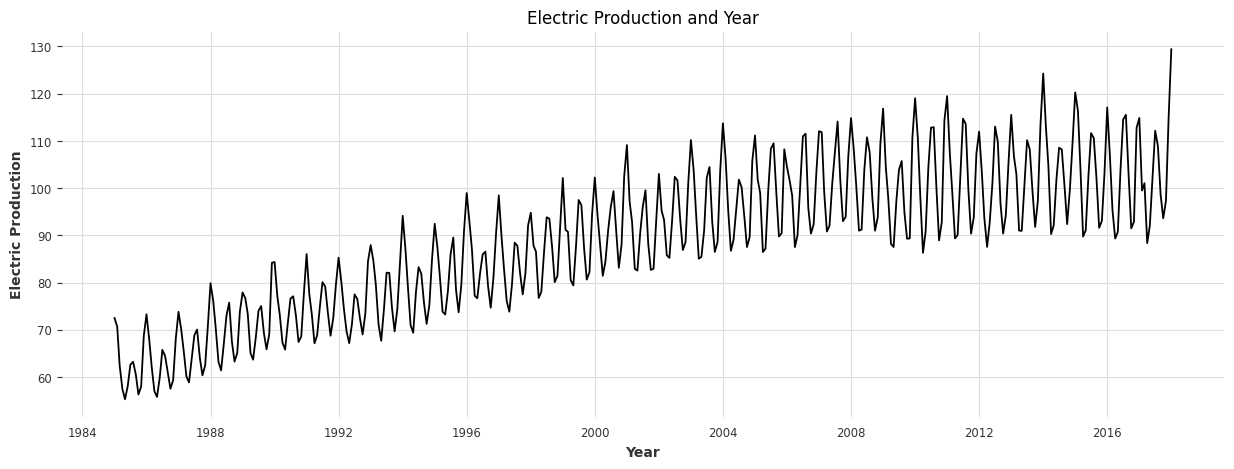

In [9]:
#date vs electric production in general
df.index=df.DATE
plt.figure(figsize=(15,5))
plt.plot(df.index, df.IPG2211A2N)
plt.xlabel("Year")
plt.ylabel("Electric Production")
plt.title("Electric Production and Year")
print(df.index)

<Axes: xlabel='Year'>

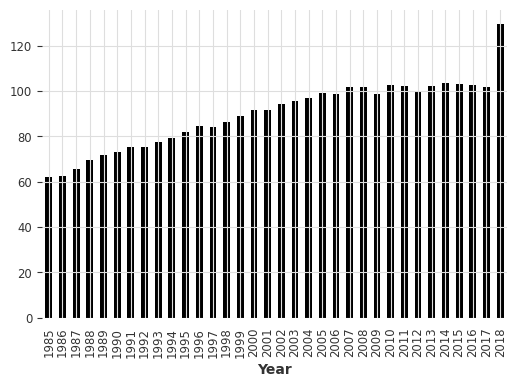

In [10]:
#Year vs electric production
plt.figure(figsize=(6,4))
df.groupby("Year")["IPG2211A2N"].mean().plot(kind="bar")
#2018 extremely high

<Axes: xlabel='Month'>

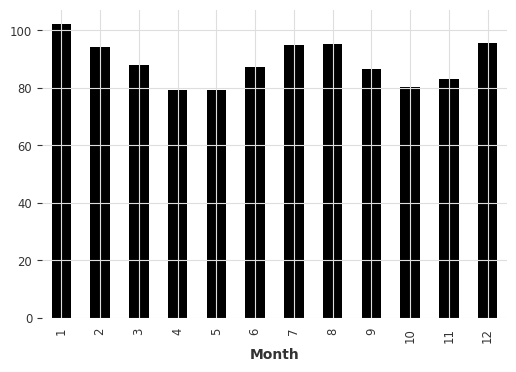

In [11]:
#month vs electric production
plt.figure(figsize=(6,4))
df.groupby("Month")["IPG2211A2N"].mean().plot(kind="bar")
#no noticeable trend

<Axes: xlabel='Week'>

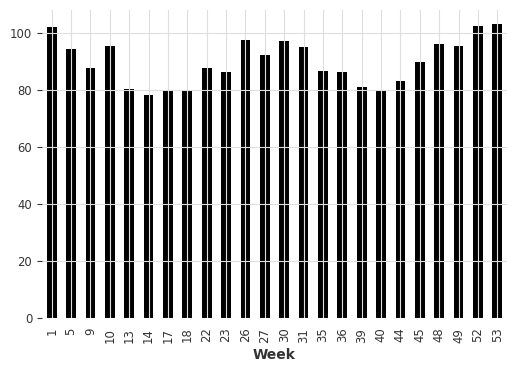

In [12]:
#week number vs electric production
plt.figure(figsize=(6,4))
df.groupby("Week")["IPG2211A2N"].mean().plot(kind="bar")
#Production is stable across weeks

<Axes: xlabel='Day of week'>

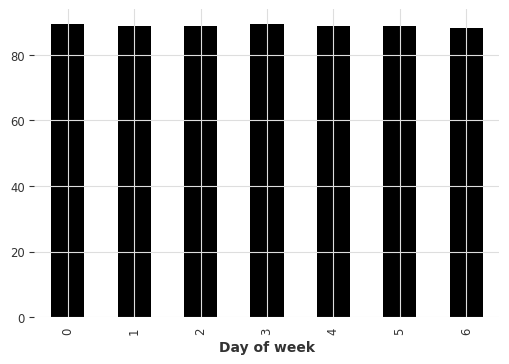

In [13]:
#day of week vs electric production
plt.figure(figsize=(6,4))
df.groupby("Day of week")["IPG2211A2N"].mean().plot(kind="bar")
#Production is stable across the days

<Axes: xlabel='Weekend'>

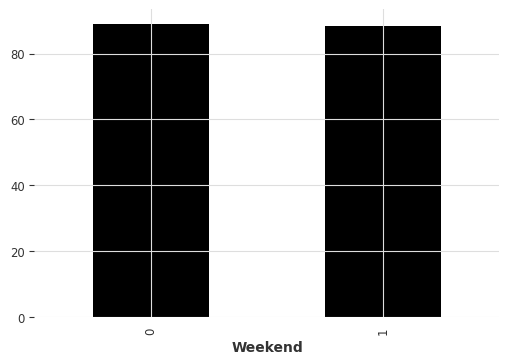

In [14]:
#Weekend vs electric production
plt.figure(figsize=(6,4))
df.groupby("Weekend")["IPG2211A2N"].mean().plot(kind="bar")
#Production is stable regardless of weekday or weekend

<Axes: xlabel='Year,Month'>

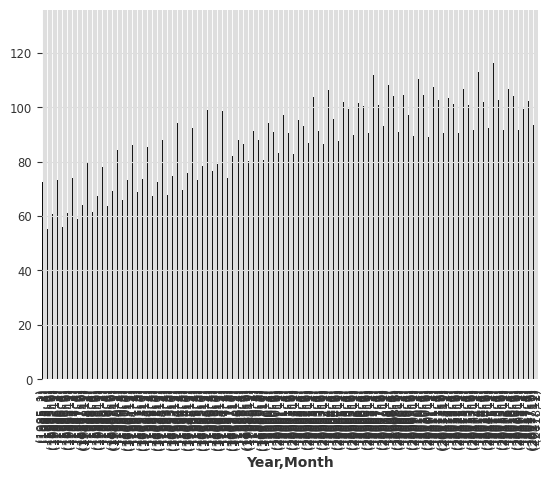

In [15]:
df.groupby(["Year", "Month"])["IPG2211A2N"].mean().plot(kind="bar")

In [16]:
#resample month--month plot has least amount of noise
df.Timestamp=pd.to_datetime(df.DATE)
df.index=df.Timestamp
df=df.resample("M").mean()

C:\Users\srjtr\AppData\Local\Temp\ipykernel_13424\1469904785.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Timestamp=pd.to_datetime(df.DATE)
C:\Users\srjtr\AppData\Local\Temp\ipykernel_13424\1469904785.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df=df.resample("M").mean()


In [17]:
print(len(df.index)*0.7)
df.head()
df[df.index.day==31]

277.9


,DATE,IPG2211A2N,Days,Month,Year,Day of week,Week,Weekend
DATE,,,,,,,,
1985-01-31,1985-01-01,72.5052,1.0,1.0,1985.0,1.0,1.0,0.0
1985-03-31,1985-03-01,62.4502,1.0,3.0,1985.0,4.0,9.0,0.0
1985-05-31,1985-05-01,55.3151,1.0,5.0,1985.0,2.0,18.0,0.0
1985-07-31,1985-07-01,62.6202,1.0,7.0,1985.0,0.0,27.0,0.0
1985-08-31,1985-08-01,63.2485,1.0,8.0,1985.0,3.0,31.0,0.0
...,...,...,...,...,...,...,...,...
2017-07-31,2017-07-01,112.1538,1.0,7.0,2017.0,5.0,26.0,1.0
2017-08-31,2017-08-01,108.9312,1.0,8.0,2017.0,1.0,31.0,0.0
2017-10-31,2017-10-01,93.6137,1.0,10.0,2017.0,6.0,39.0,1.0


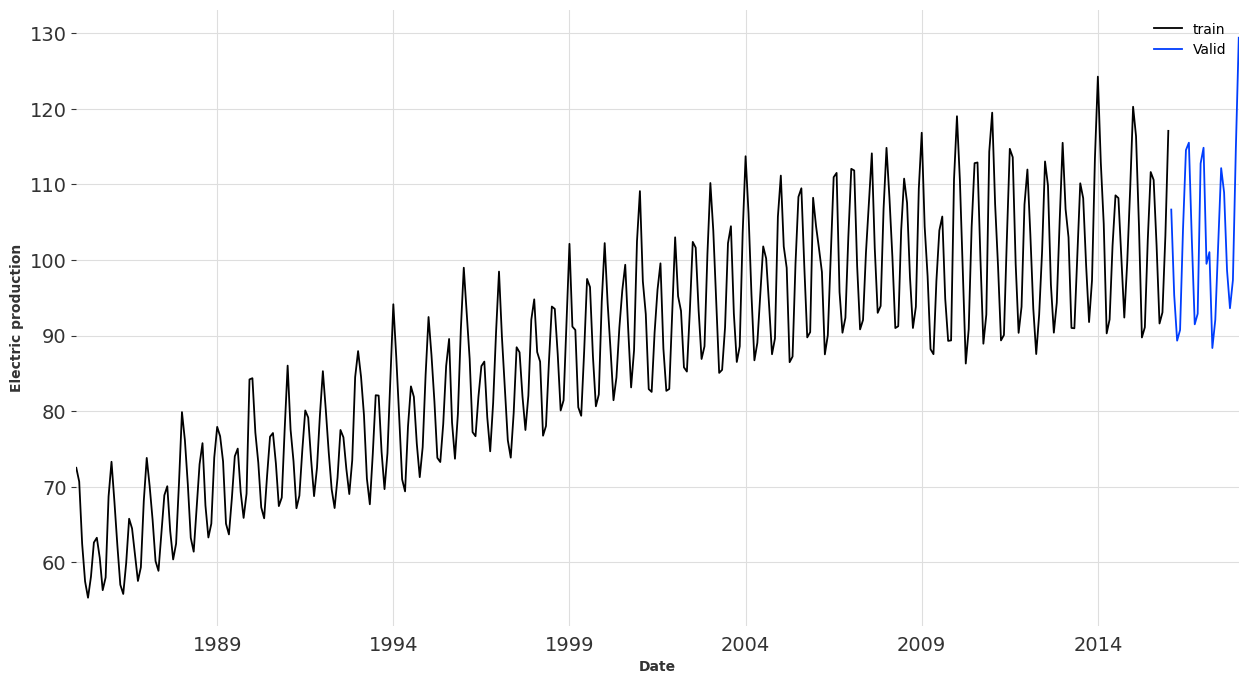

In [18]:
#resample months
# train=df.loc["1985-01-01":"2008-01-01"]
# valid=df.loc["2008-01-01":]

train = df.iloc[:-24]
valid  = df.iloc[-24:]

train.IPG2211A2N.plot(figsize=(15,8), fontsize=14, label="train")
valid.IPG2211A2N.plot(figsize=(15,8), fontsize=14, label="Valid")
plt.xlabel("Date")
plt.ylabel("Electric production")
plt.legend(loc="best")

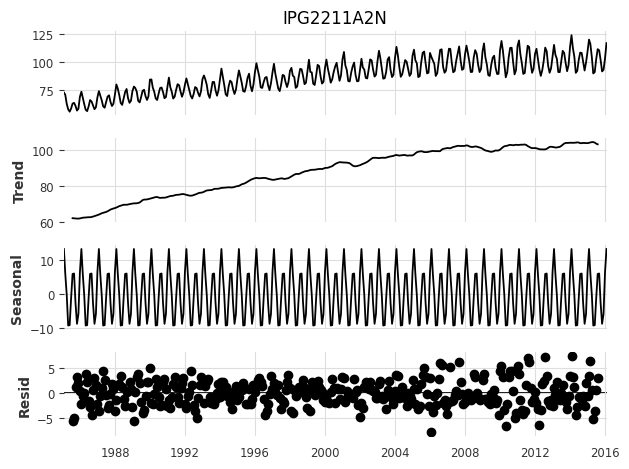

In [19]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.IPG2211A2N).plot()
result=sm.tsa.stattools.adfuller(train.IPG2211A2N)
plt.show()

In [20]:
df.head()

,DATE,IPG2211A2N,Days,Month,Year,Day of week,Week,Weekend
DATE,,,,,,,,
1985-01-31,1985-01-01,72.5052,1.0,1.0,1985.0,1.0,1.0,0.0
1985-02-28,1985-02-01,70.6720,1.0,2.0,1985.0,4.0,5.0,0.0
1985-03-31,1985-03-01,62.4502,1.0,3.0,1985.0,4.0,9.0,0.0
1985-04-30,1985-04-01,57.4714,1.0,4.0,1985.0,0.0,14.0,0.0
1985-05-31,1985-05-01,55.3151,1.0,5.0,1985.0,2.0,18.0,0.0


# SARIMA

In [156]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['IPG2211A2N'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -2.25699035004725
p-value: 0.18621469116586592


In [157]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

y = df['IPG2211A2N']

# raw
res_raw = adfuller(y.dropna())
print("raw   ADF stat, p:", res_raw[0], res_raw[1])

# first difference (d=1)
y_d1 = y.diff().dropna()
res_d1 = adfuller(y_d1)
print("1st diff ADF stat, p:", res_d1[0], res_d1[1])

# seasonal difference (D=1, m=12)
y_D1 = y.diff(12).dropna()
res_D1 = adfuller(y_D1)
print("seasonal diff (lag12) ADF stat, p:", res_D1[0], res_D1[1])

# combined d=1 and D=1
y_d1D1 = y.diff().diff(12).dropna()
res_d1D1 = adfuller(y_d1D1)
print("1st + seasonal diff ADF stat, p:", res_d1D1[0], res_d1D1[1])


raw   ADF stat, p: -2.25699035004725 0.18621469116586592
1st diff ADF stat, p: -7.104890882267312 4.0777865655394095e-10
seasonal diff (lag12) ADF stat, p: -5.673482023381753 8.812644938089282e-07
1st + seasonal diff ADF stat, p: -8.02203920998501 2.0639252090771566e-12


<Figure size 1200x400 with 0 Axes>

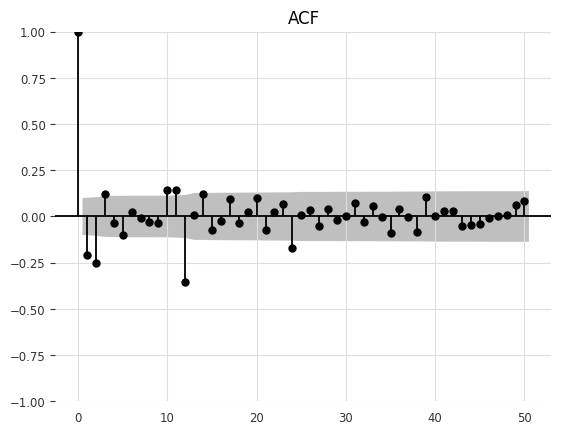

<Figure size 1200x400 with 0 Axes>

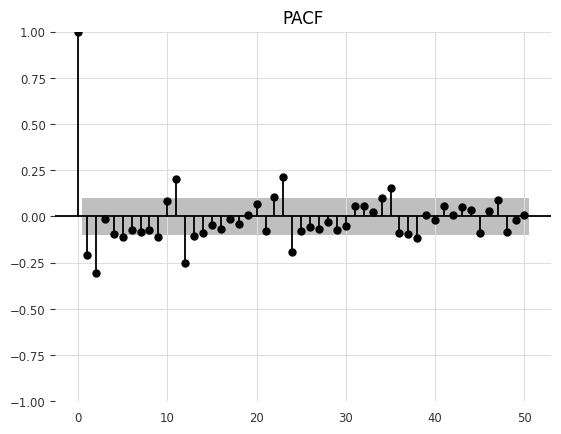

In [158]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# choose the differenced series that is stationary, e.g. y_d1D1
series = df['IPG2211A2N'].diff().diff(12).dropna()
# y_d1D1  # replace with whichever was stationary

plt.figure(figsize=(12,4))
plot_acf(series, lags=50, alpha=0.05)
plt.title('ACF')
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(series, lags=50, method='ywm', alpha=0.05)   # method optional
plt.title('PACF')
plt.show()

### Hyperparameter tuning

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = df['IPG2211A2N']
results = {}

candidates = [
    ((1,1,1),(1,1,1,12)),
    ((1,1,0),(1,1,1,12)),
    ((0,1,1),(1,1,1,12))
]

for order, seas_order in candidates:
    model = SARIMAX(y, order=order, seasonal_order=seas_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    res = model.fit(disp=False)
    print(f"Model SARIMA{order}x{seas_order} - AIC:{res.aic:.2f}, BIC:{res.bic:.2f}")

Model SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:1727.09, BIC:1746.66
Model SARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:1794.35, BIC:1810.01
Model SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:1775.53, BIC:1791.18


                                     SARIMAX Results                                      
Dep. Variable:                         IPG2211A2N   No. Observations:                  397
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -858.546
Date:                            Wed, 15 Oct 2025   AIC                           1727.092
Time:                                    10:25:43   BIC                           1746.659
Sample:                                01-31-1985   HQIC                          1734.864
                                     - 01-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5234      0.046     11.370      0.000       0.433       0.614
ma.L1         -0.9540      0.018   

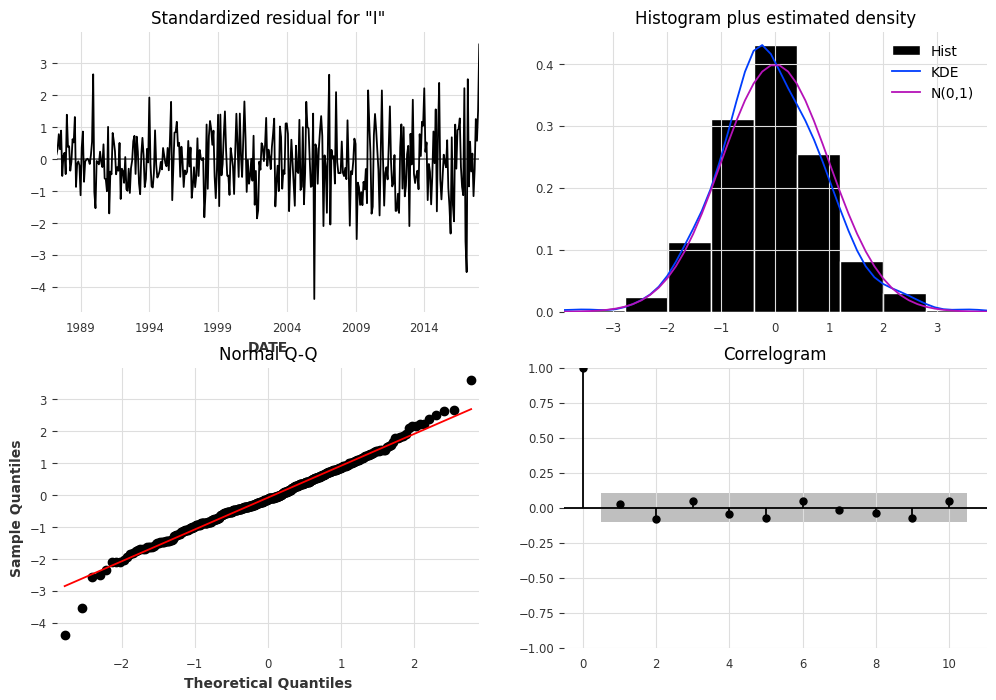

In [160]:
model = SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,12),
                enforce_stationarity=False, enforce_invertibility=False)
res = model.fit(disp=False)

print(res.summary())
res.plot_diagnostics(figsize=(12,8))
plt.show()

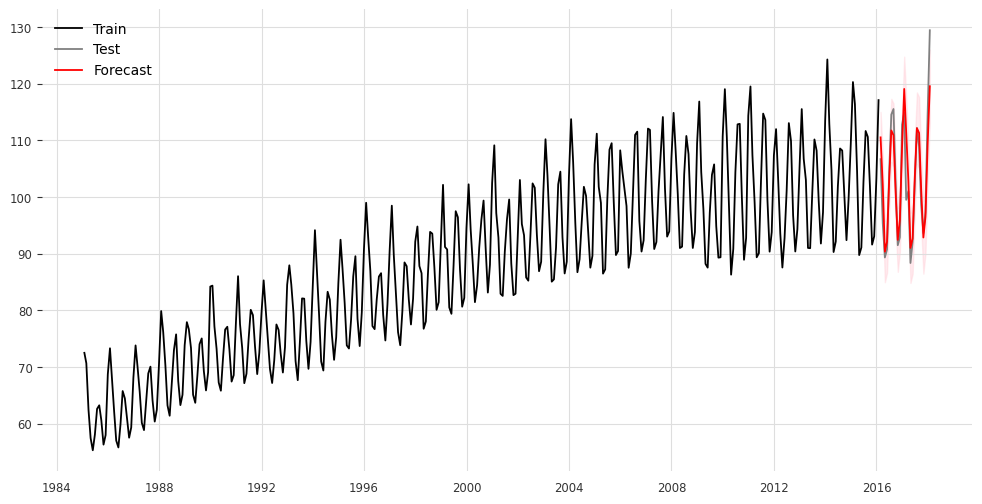

Test RMSE: 4.280878989797871
Test MAPE: 0.0300057610904664
Test MAE: 3.1668802006548114
Test R2: 0.8317492686883661


In [23]:
train = y.iloc[:-24]
test  = y.iloc[-24:]

model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12),
                enforce_stationarity=False, enforce_invertibility=False)
res = model.fit(disp=False)

pred = res.get_forecast(steps=24)
pred_mean = pred.predicted_mean
ci = pred.conf_int()

# Plot
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='gray')
plt.plot(pred_mean.index, pred_mean, label='Forecast', color='red')
plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='pink', alpha=0.3)
plt.legend()
plt.show()

# Accuracy
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
rmse = np.sqrt(mean_squared_error(test, pred_mean))
mape = mean_absolute_percentage_error(test, pred_mean)
mae = mean_absolute_error (test, pred_mean)
r2 = r2_score (test, pred_mean)
print("Test RMSE:", rmse)
print("Test MAPE:", mape)
print("Test MAE:", mae)
print("Test R2:", r2)

In [24]:
results = {}

In [25]:
results["SARIMA"] = {
    "RMSE": np.sqrt(mean_squared_error(test, pred_mean)),
    "MAPE": mean_absolute_percentage_error(test, pred_mean),
    "MAE": mean_absolute_error (test, pred_mean),
    "R2": r2_score (test, pred_mean)
    # "forecast": sarima_forecast
}

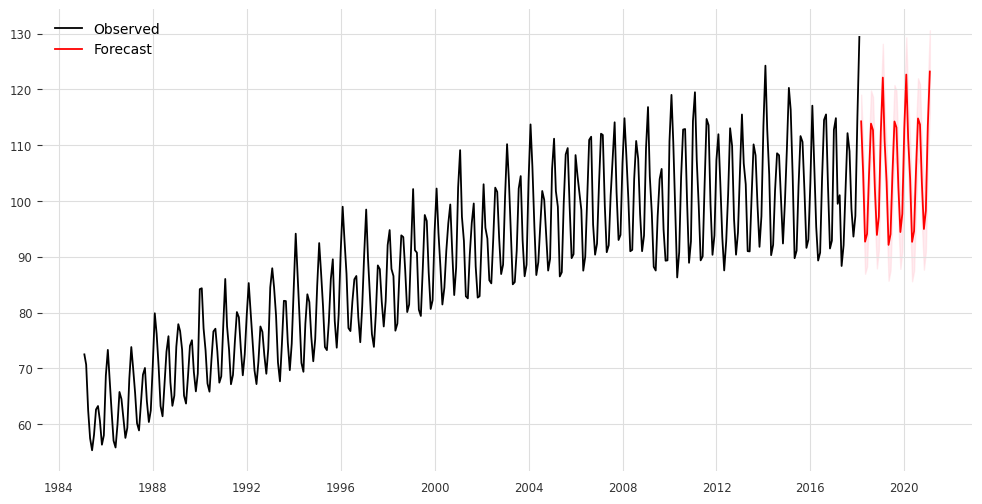

In [164]:
final_model = SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,12),
                      enforce_stationarity=False, enforce_invertibility=False)
final_res = final_model.fit(disp=False)

forecast = final_res.get_forecast(steps=36)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12,6))
plt.plot(y.index, y, label='Observed')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:,0], forecast_ci.iloc[:,1],
                 color='pink', alpha=0.3)
plt.legend()
plt.show()

# Prophet

In [165]:
# !pip install prophet

In [26]:
from prophet import Prophet

df2.index = pd.to_datetime(df2.index)

# Prepare dataframe
prophet_df = df2.reset_index().rename(columns={'DATE':'ds','IPG2211A2N':'y'})

# Prophet requires columns: ds (date), y (value)
# Make sure ds is datetime
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])
prophet_df.head()

,index,ds,y
0,1970-01-01 00:00:00.000000000,1985-01-01,72.5052
1,1970-01-01 00:00:00.000000001,1985-02-01,70.6720
2,1970-01-01 00:00:00.000000002,1985-03-01,62.4502
3,1970-01-01 00:00:00.000000003,1985-04-01,57.4714
4,1970-01-01 00:00:00.000000004,1985-05-01,55.3151


In [27]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
m.fit(prophet_df)

19:08:33 - cmdstanpy - INFO - Chain [1] start processing
19:08:34 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
import pandas as pd
import numpy as np
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

def summarize_prophet_model(model, df_actual=None, show_plots=True):
    """
    Summarizes a fitted Prophet model: trend, changepoints, seasonality, and metrics.

    Parameters
    ----------
    model : Prophet
        A fitted Prophet model object.
    df_actual : pd.DataFrame, optional
        DataFrame with columns ['ds', 'y'] for evaluating forecast accuracy.
    show_plots : bool
        If True, display trend & component plots.
    """

    print("===================================")
    print("🌟 PROPHET MODEL SUMMARY")
    print("===================================")

    # Trend parameters
    k = model.params['k'][0][0]   # growth rate
    m = model.params['m'][0][0]   # offset/intercept

    print(f"\n📈 Trend Parameters:")
    print(f"  • Growth rate (k): {k:.6f}")
    print(f"  • Offset (m): {m:.6f}")
    print(f"  • Growth type: {model.growth}")
    print(f"  • Seasonality mode: {model.seasonality_mode}")
    print(f"  • Total changepoints: {len(model.changepoints)}")

    # Changepoints
    deltas = model.params['delta'][0]
    trend_changes = pd.DataFrame({
        'changepoint': model.changepoints,
        'delta': deltas
    })
    print("\n⚡ Changepoint Summary (Top 5 by |Δ|):")
    print(trend_changes.reindex(trend_changes.delta.abs().sort_values(ascending=False).index).head(5))

    # print (df_actual.head())
    
    # Seasonality summary
    seasonal_components = model.predict_seasonal_components(model.history)
    # If 'ds' column exists, drop it safely
    if 'ds' in seasonal_components.columns:
        df_season = seasonal_components.drop(columns=['ds'])
    else:
        df_season = seasonal_components.copy()
    strengths = df_season.abs().mean().sort_values(ascending=False)

    print("\n🎡 Seasonality Strength Summary:")
    print(strengths)

    #Forecast performance
    if df_actual is not None:
        # Generate forecast for actual ds range
        forecast = model.predict(df_actual[['ds']])
        y_true = df_actual['y'].values
        y_pred = forecast['yhat'].values

        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

        print("\n📊 Forecast Performance Metrics:")
        print(f"  • MAE : {mae:.3f}")
        print(f"  • RMSE: {rmse:.3f}")
        print(f"  • MAPE: {mape:.2f}%")
    else:
        print("\n📊 Forecast Performance Metrics: (Skipped — df_actual not provided)")

    # Plots
    if show_plots:
        print("\n📉 Displaying model plots...")
        forecast_full = model.predict(model.history)
        fig1 = model.plot(forecast_full)
        add_changepoints_to_plot(fig1.gca(), model, forecast_full)
        plt.title("Forecast with Changepoints")
        plt.show()

        fig2 = model.plot_components(forecast_full)
        plt.show()

    print("\n✅ Summary complete.")

🌟 PROPHET MODEL SUMMARY

📈 Trend Parameters:
  • Growth rate (k): 0.547913
  • Offset (m): 0.474485
  • Growth type: linear
  • Seasonality mode: additive
  • Total changepoints: 25

⚡ Changepoint Summary (Top 5 by |Δ|):
    changepoint     delta
265  2007-02-01 -0.094297
253  2006-02-01 -0.075775
278  2008-03-01 -0.059661
240  2005-01-01 -0.057819
228  2004-01-01 -0.045877

🎡 Seasonality Strength Summary:
additive_terms                6.399137
additive_terms_lower          6.399137
additive_terms_upper          6.399137
yearly                        6.399137
yearly_lower                  6.399137
yearly_upper                  6.399137
multiplicative_terms          0.000000
multiplicative_terms_lower    0.000000
multiplicative_terms_upper    0.000000
dtype: float64

📊 Forecast Performance Metrics:
  • MAE : 2.252
  • RMSE: 2.863
  • MAPE: 2.58%

📉 Displaying model plots...


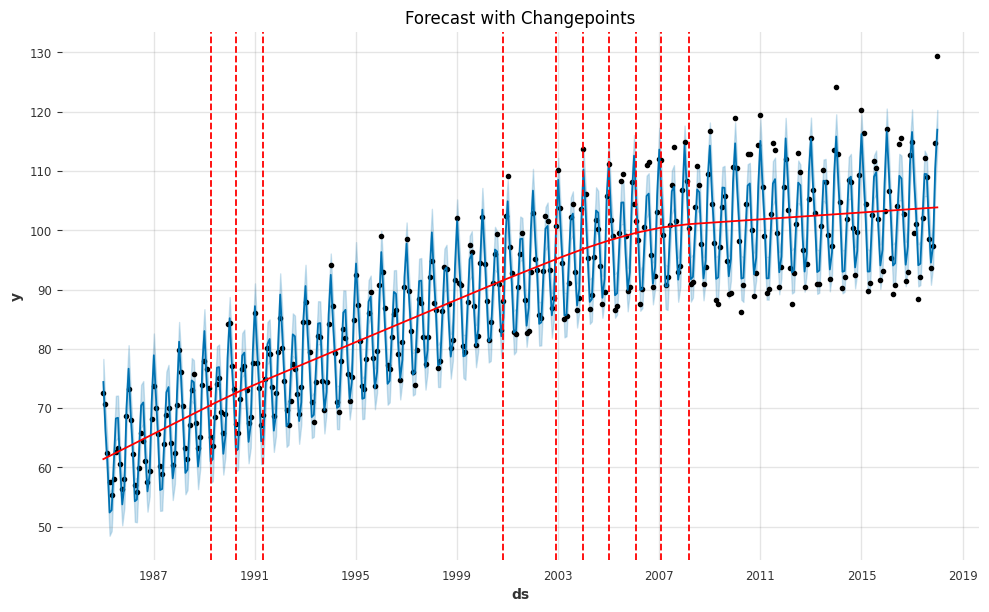

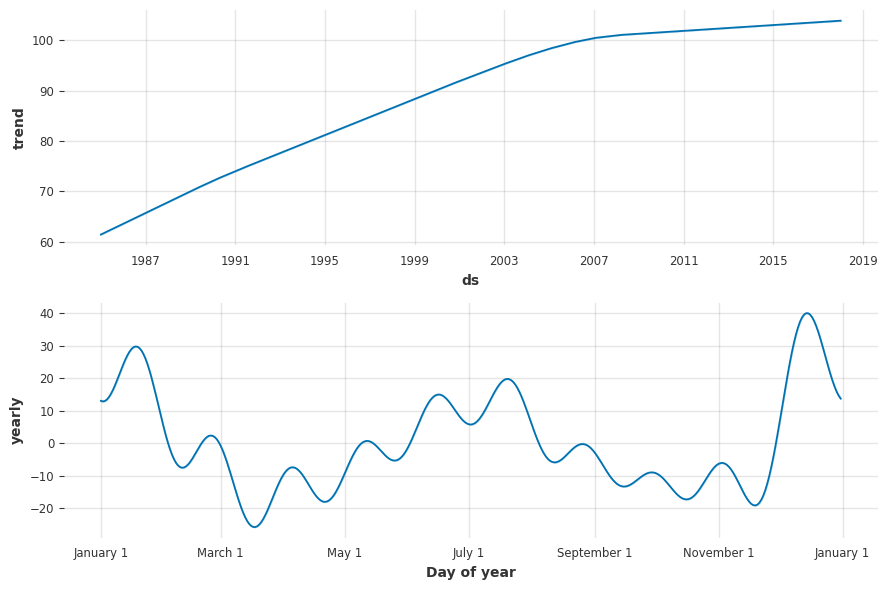


✅ Summary complete.


In [29]:
# Run summary
summarize_prophet_model(m, df_actual=prophet_df)

In [193]:
from prophet.plot import plot_components_plotly, plot_plotly
from prophet.plot import plot_components, plot_forecast_component, plot_plotly
import matplotlib.pyplot as plt

In [194]:
future = m.make_future_dataframe(periods=36, freq='M')  # monthly frequency
forecast = m.predict(future)

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
428,2020-08-31,102.276798,98.723337,105.783415
429,2020-09-30,95.546219,91.930635,99.082735
430,2020-10-31,98.022156,94.273637,101.818194
431,2020-11-30,108.497289,104.864111,112.297603
432,2020-12-31,118.257198,114.541386,121.845425


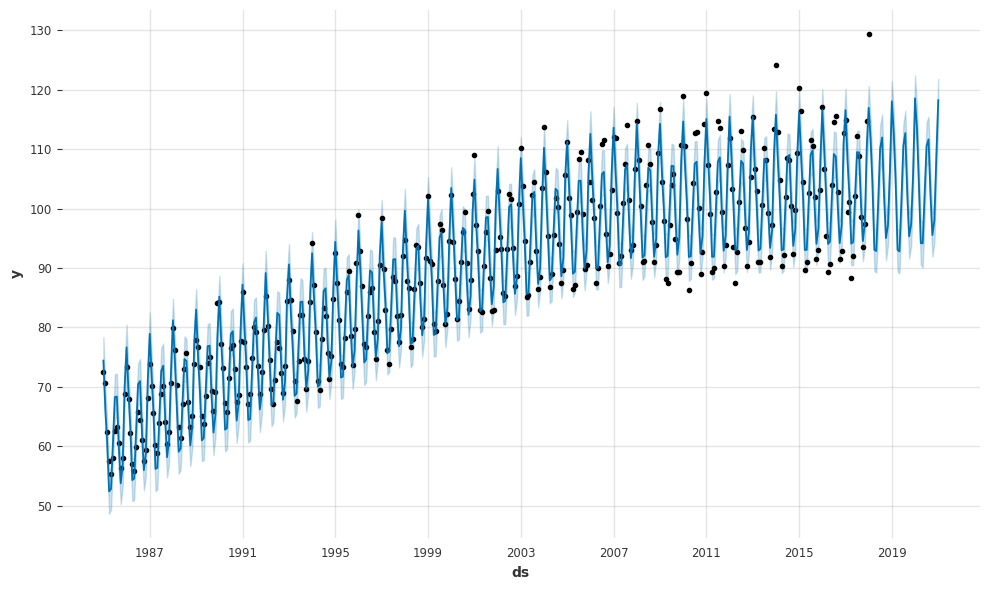

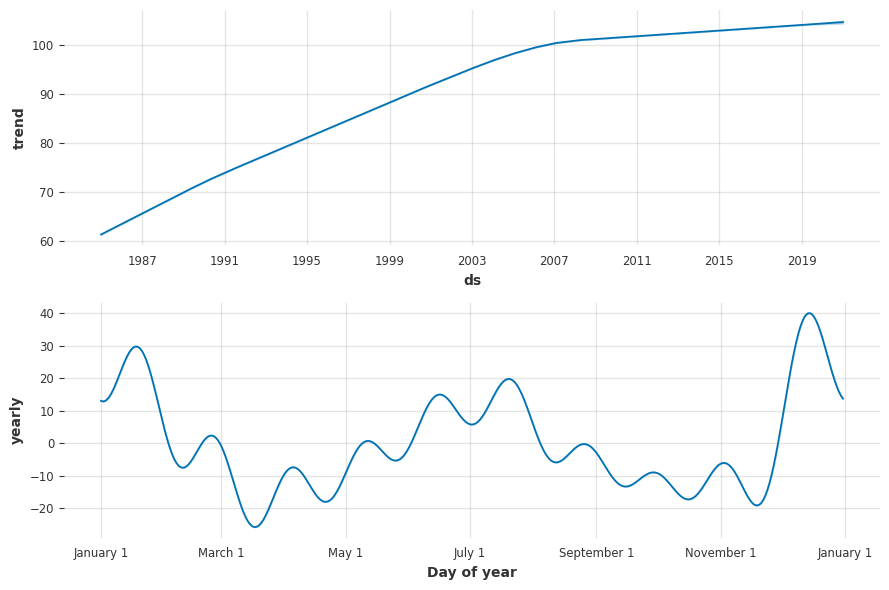

In [195]:
import matplotlib.pyplot as plt

fig1 = m.plot(forecast)
plt.show()

fig2 = m.plot_components(forecast)
plt.show()

10:30:36 - cmdstanpy - INFO - Chain [1] start processing
10:30:36 - cmdstanpy - INFO - Chain [1] done processing
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Prophet Test RMSE: 5.047778769037977


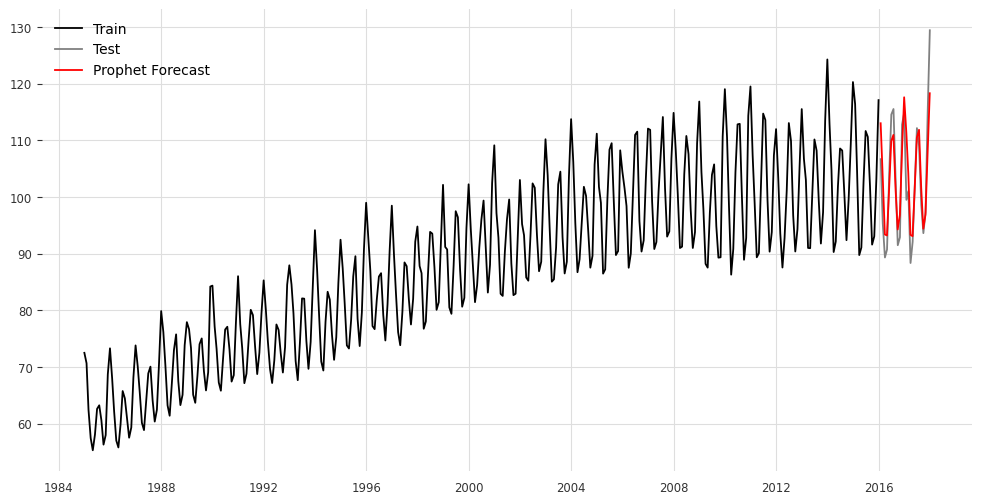

In [196]:
train = prophet_df.iloc[:-24]
test  = prophet_df.iloc[-24:]

m = Prophet(yearly_seasonality=True)
m.fit(train)

future = m.make_future_dataframe(periods=24, freq='M')
forecast = m.predict(future)

# Compare test vs forecast
pred = forecast[['ds','yhat']].set_index('ds').iloc[-24:]
actual = test.set_index('ds')

from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(actual['y'], pred['yhat']))
print("Prophet Test RMSE:", rmse)

# Plot
plt.figure(figsize=(12,6))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test', color='gray')
plt.plot(pred.index, pred['yhat'], label='Prophet Forecast', color='red')
plt.legend()
plt.show()

In [197]:
results["PROPHET"] = {
    "RMSE": np.sqrt(mean_squared_error(actual['y'], pred['yhat'])),
    "MAPE": mean_absolute_percentage_error(actual['y'], pred['yhat']),
    # "forecast": 'prophet_forecast'
}

10:30:50 - cmdstanpy - INFO - Chain [1] start processing
10:30:50 - cmdstanpy - INFO - Chain [1] done processing
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


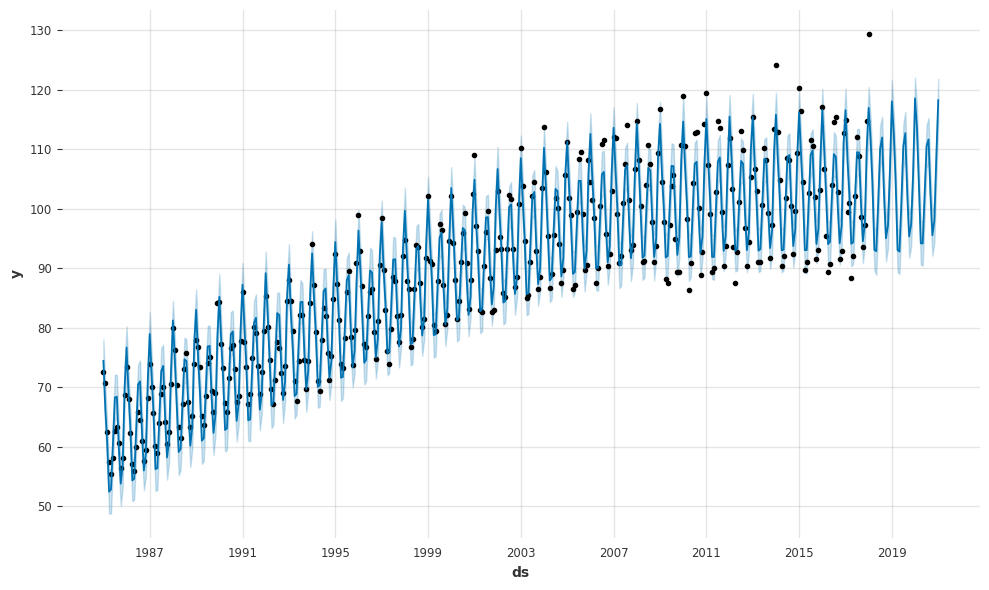

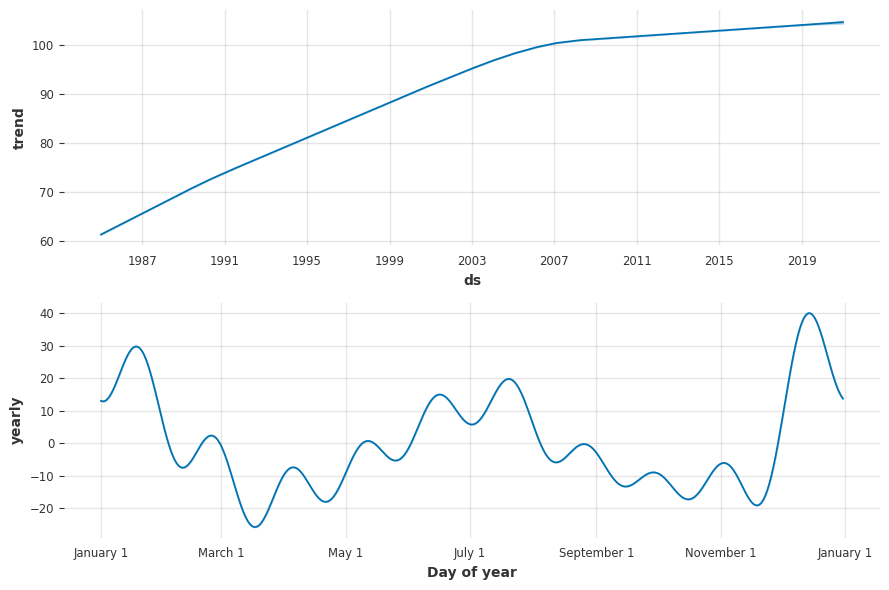

In [198]:
from prophet import Prophet
import matplotlib.pyplot as plt

m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
m.fit(prophet_df)

# Forecast 36 months ahead
future = m.make_future_dataframe(periods=36, freq='M')
forecast = m.predict(future)

# Plot forecasts
fig1 = m.plot(forecast)
plt.show()

fig2 = m.plot_components(forecast)
plt.show()

### Hyperparameter tuning

In [124]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# Prepare your data
df2.index = pd.to_datetime(df2.index)
prophet_df = df2.reset_index().rename(columns={'DATE':'ds','IPG2211A2N':'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

# Define parameter grid
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.8, 0.9, 0.95]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

# Store performance for each params
rmses = []

for params in all_params:
    m = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        **params
    )
    m.fit(prophet_df)

    # Cross-validation (rolling forecast origin)
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)

    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses

best_params = tuning_results.loc[tuning_results['rmse'].idxmin()]
print("Best Parameters:\n", best_params)

08:58:05 - cmdstanpy - INFO - Chain [1] start processing
08:58:05 - cmdstanpy - INFO - Chain [1] done processing
08:58:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
08:58:05 - cmdstanpy - INFO - Chain [1] start processing
08:58:06 - cmdstanpy - INFO - Chain [1] done processing
08:58:29 - cmdstanpy - INFO - Chain [1] start processing
08:58:29 - cmdstanpy - INFO - Chain [1] done processing
08:58:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
08:58:30 - cmdstanpy - INFO - Chain [1] start processing
08:58:31 - cmdstanpy - INFO - Chain [1] done processing
08:58:36 - cmdstanpy - INFO - Chain [1] start processing
08:58:36 - cmdstanpy - INFO - Chain [1] done processing
08:58:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

Best Parameters:
 changepoint_prior_scale               0.1
seasonality_prior_scale              0.01
seasonality_mode           multiplicative
changepoint_range                     0.8
rmse                             3.028458
Name: 51, dtype: object


19:10:24 - cmdstanpy - INFO - Chain [1] start processing
19:10:24 - cmdstanpy - INFO - Chain [1] done processing
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Prophet Test RMSE: 4.254666859834258


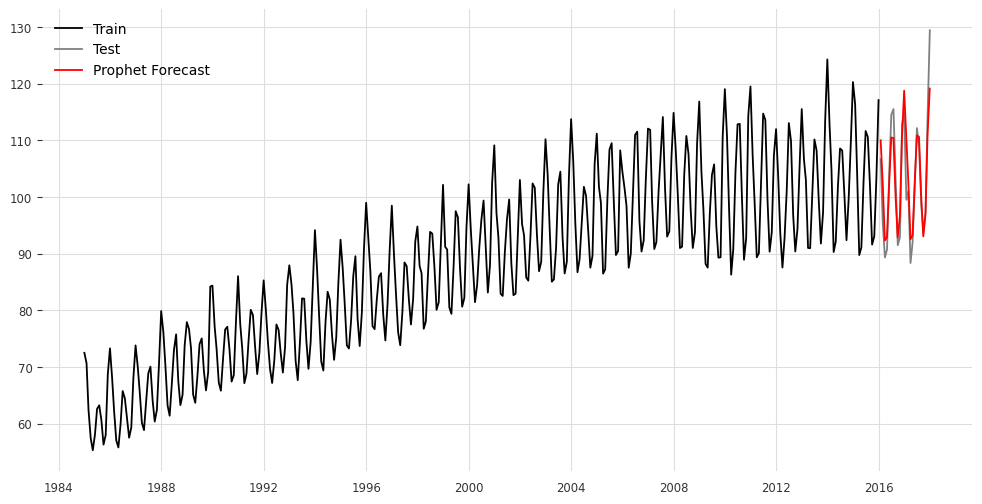

In [30]:
train = prophet_df.iloc[:-24]
test  = prophet_df.iloc[-24:]

m = Prophet(yearly_seasonality=True, changepoint_prior_scale= 0.1, seasonality_prior_scale= 0.015, seasonality_mode= 'multiplicative', 
            changepoint_range= 0.72)
m.fit(train)

future = m.make_future_dataframe(periods=24, freq='M')
forecast = m.predict(future)

# Compare test vs forecast
pred = forecast[['ds','yhat']].set_index('ds').iloc[-24:]
actual = test.set_index('ds')

from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(actual['y'], pred['yhat']))
print("Prophet Test RMSE:", rmse)

# Plot
plt.figure(figsize=(12,6))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test', color='gray')
plt.plot(pred.index, pred['yhat'], label='Prophet Forecast', color='red')
plt.legend()
plt.show()

In [31]:
rmse = np.sqrt(mean_squared_error(actual['y'], pred['yhat']))
mape = mean_absolute_percentage_error(actual['y'], pred['yhat'])
mae = mean_absolute_error (actual['y'], pred['yhat'])
r2 = r2_score (actual['y'], pred['yhat'])
print("Test RMSE:", rmse)
print("Test MAPE:", mape)
print("Test MAE:", mae)
print("Test R2:", r2)

Test RMSE: 4.254666859834258
Test MAPE: 0.0313187539966334
Test MAE: 3.268914615508225
Test R2: 0.833803383289345


In [32]:
results["PROPHET"] = {
    "RMSE": np.sqrt(mean_squared_error(actual['y'], pred['yhat'])),
    "MAPE": mean_absolute_percentage_error(actual['y'], pred['yhat']),
    "MAE": mean_absolute_error (actual['y'], pred['yhat']),
    "R2": r2_score (actual['y'], pred['yhat'])
}

### Model Diagnostic

In [3]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [204]:
# cross-validation setup for monthly data
df_cv = cross_validation(
    m, 
    initial='730 days',  # ≈ 2 years of initial training data
    period='30 days',    # evaluate every 1 month
    horizon='180 days'   # forecast horizon of 6 months
)

  0%|                                                                                          | 0/348 [00:00<?, ?it/s]10:34:53 - cmdstanpy - INFO - Chain [1] start processing
10:34:54 - cmdstanpy - INFO - Chain [1] done processing
  0%|▏                                                                                 | 1/348 [00:00<03:33,  1.63it/s]10:34:54 - cmdstanpy - INFO - Chain [1] start processing
10:34:54 - cmdstanpy - INFO - Chain [1] done processing
  1%|▍                                                                                 | 2/348 [00:01<02:57,  1.95it/s]10:34:54 - cmdstanpy - INFO - Chain [1] start processing
10:34:54 - cmdstanpy - INFO - Chain [1] done processing
  1%|▋                                                                                 | 3/348 [00:01<02:57,  1.94it/s]10:34:55 - cmdstanpy - INFO - Chain [1] start processing
10:34:55 - cmdstanpy - INFO - Chain [1] done processing
  1%|▉                                                                  

In [205]:
df_p = performance_metrics(df_cv)
print(df_p.head())

  horizon       mse      rmse       mae      mape     mdape     smape  \
0 19 days  7.741255  2.782311  2.140192  0.023242  0.020716  0.023155   
1 20 days  7.889101  2.808754  2.163193  0.023430  0.020980  0.023355   
2 21 days  7.709632  2.776622  2.119291  0.022944  0.020671  0.022864   
3 22 days  7.636693  2.763457  2.106710  0.022806  0.020671  0.022712   
4 23 days  7.496727  2.738015  2.082265  0.022584  0.020542  0.022471   

   coverage  
0  0.585366  
1  0.586696  
2  0.604878  
3  0.612195  
4  0.612860  


D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\prophet\plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


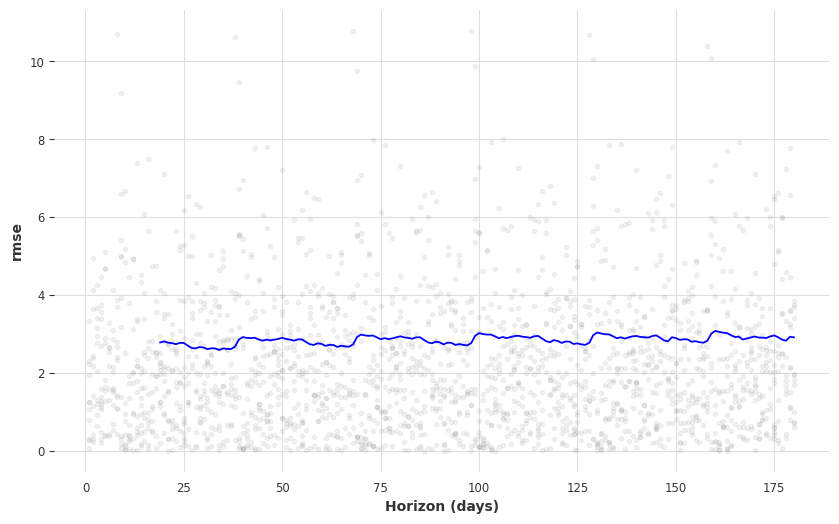

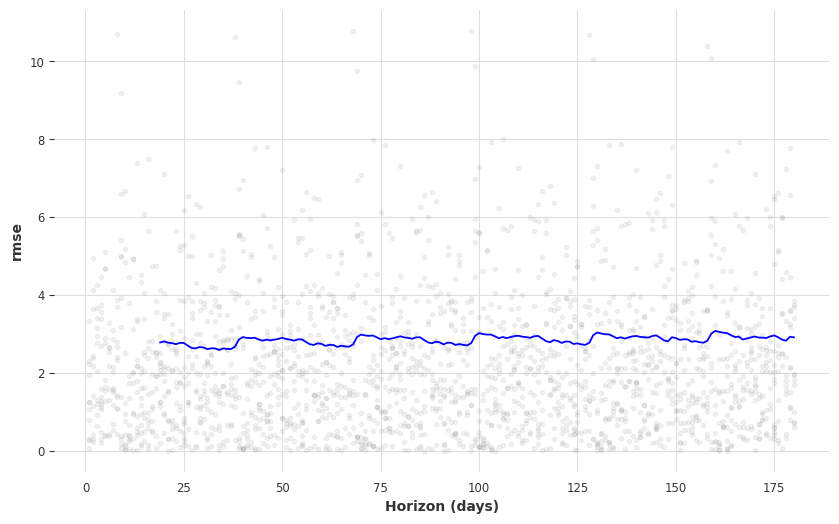

In [206]:
# Plot RMSE over horizon
plot_cross_validation_metric(df_cv, metric='rmse')

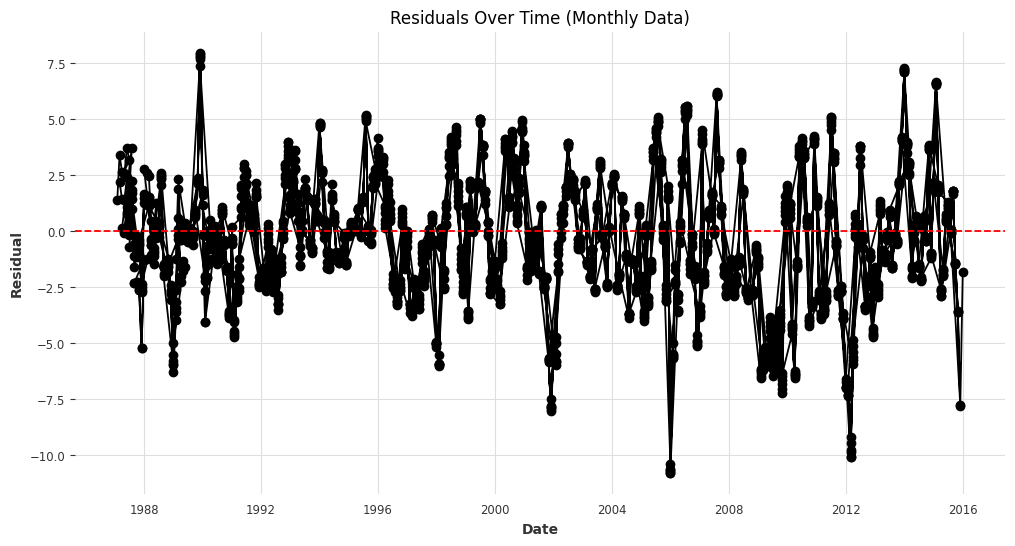

In [207]:
import matplotlib.pyplot as plt

df_cv['residual'] = df_cv['y'] - df_cv['yhat']

plt.figure(figsize=(12,6))
plt.plot(df_cv['ds'], df_cv['residual'], marker='o')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Over Time (Monthly Data)')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()

# N-BEATS

In [208]:
from darts import TimeSeries
import pandas as pd

# Prepare dataset
df3 = df.copy()
df3.index = pd.to_datetime(df3.index)

series = TimeSeries.from_series(df3['IPG2211A2N'])
series

<TimeSeries (DataArray) (DATE: 397, component: 1, sample: 1)> Size: 3kB
array([[[ 72.5052]],

       [[ 70.672 ]],

       [[ 62.4502]],

       [[ 57.4714]],

       [[ 55.3151]],

       [[ 58.0904]],

       [[ 62.6202]],

       [[ 63.2485]],

       [[ 60.5846]],

       [[ 56.3154]],

...

       [[ 88.353 ]],

       [[ 92.0805]],

       [[102.1532]],

       [[112.1538]],

       [[108.9312]],

       [[ 98.6154]],

       [[ 93.6137]],

       [[ 97.3359]],

       [[114.7212]],

       [[129.4048]]])
Coordinates:
  * DATE       (DATE) datetime64[ns] 3kB 1985-01-31 1985-02-28 ... 2018-01-31
  * component  (component) <U10 40B 'IPG2211A2N'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

In [209]:
# from darts.utils.model_selection import train_test_split
train, val = series.split_before(0.9)  # 90% train, 10% test
# train, val = train_test_split(series, test_size=0.2)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.2 M  | train
-------------------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Epoch 99: 100%|██████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.71it/s, train_loss=12.20]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████████████████████████████████████████████████| 11/11 [00:02<00:00,  3.70it/s, train_loss=12.20]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.69it/s]


<Axes: xlabel='DATE'>

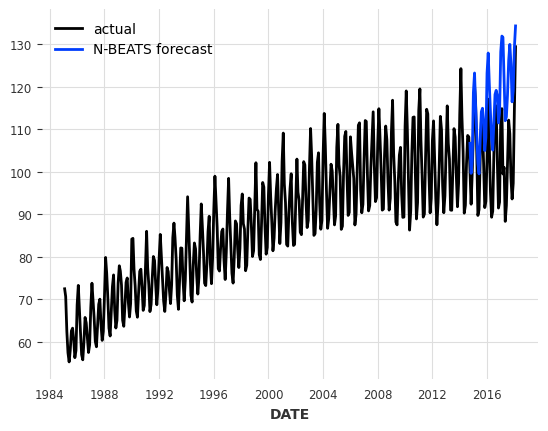

In [210]:
from darts.models import NBEATSModel

nbeats = NBEATSModel(
    input_chunk_length=24,   # use past 24 months
    output_chunk_length=12,  # predict next 12 months
    n_epochs=100,
    random_state=42
)

nbeats.fit(train)
nbeats_forecast = nbeats.predict(len(val))

# Plot
series.plot(label="actual")
nbeats_forecast.plot(label="N-BEATS forecast")

In [212]:
from darts.metrics import rmse, mape, mae, r2_score as r2
rmse = rmse(val, nbeats_forecast)
mape = mape(val, nbeats_forecast)
mae = mae(val, nbeats_forecast)
r2 = r2(val, nbeats_forecast)
print("Test RMSE:", rmse)
print("Test MAPE:", mape)
print("Test MAE:", mae)
print("Test R2:", r2)

Test RMSE: 15.262347489515532
Test MAPE: 13.292040535527125
Test MAE: 13.224584839818593
Test R2: -1.3054728913082618


In [213]:
results_novel = {}

In [214]:
from darts.metrics import rmse, mape
results["N-BEATS"] = {
    "RMSE": rmse(val, nbeats_forecast),
    "MAPE": mape(val, nbeats_forecast),
    "forecast": nbeats_forecast
}

### Hyperparameter tuning

In [268]:
import pandas as pd
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.utils.model_selection import train_test_split
from darts.metrics import mape
from sklearn.model_selection import ParameterGrid


# Prepare dataset
df3 = df.copy()
df3.index = pd.to_datetime(df3.index)
series = TimeSeries.from_series(df3['IPG2211A2N'])

# Split data
train, val = train_test_split(series, test_size=0.2)

# Define parameter grid
param_grid = {
    "input_chunk_length": [12, 24],
    "output_chunk_length": [6, 12],
    "num_blocks": [1, 2],
    "num_layers": [2, 4],
    "layer_widths": [256, 512],
    "n_epochs": [100],
}

# Manual grid search

results = []
best_score = float("inf")
best_model = None
best_params = None

for params in ParameterGrid(param_grid):
    print(f"Training with: {params}")
    try:
        model = NBEATSModel(random_state=42, **params)
        model.fit(train, verbose=False)
        pred = model.predict(len(val))
        score = mape(val, pred)
        results.append((params, score))
        print(f"MAPE: {score:.2f}")
        
        if score < best_score:
            best_score = score
            best_model = model
            best_params = params
    except Exception as e:
        print(f"⚠️ Skipping due to error: {e}")
        continue

print("\n✅ Best Parameters:", best_params)
print(f"📉 Best Validation MAPE: {best_score:.2f}")

Training with: {'input_chunk_length': 12, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 2, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.28it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 10.85
Training with: {'input_chunk_length': 12, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 2, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.37it/s]
MAPE: 5.30
Training with: {'input_chunk_length': 12, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 4, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  0.84it/s]
MAPE: 3.63
Training with: {'input_chunk_length': 12, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 4, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.81it/s]
MAPE: 3.13
Training with: {'input_chunk_length': 12, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 2, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  0.65it/s]
MAPE: 5.77
Training with: {'input_chunk_length': 12, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 2, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.30it/s]
MAPE: 4.64
Training with: {'input_chunk_length': 12, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 4, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  0.56it/s]
MAPE: 3.00
Training with: {'input_chunk_length': 12, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 4, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.16it/s]


GPU available: True (cuda), used: True


MAPE: 5.98
Training with: {'input_chunk_length': 12, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 2, 'output_chunk_length': 6}


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  0.93it/s]
MAPE: 10.69
Training with: {'input_chunk_length': 12, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 2, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.15it/s]
MAPE: 3.15
Training with: {'input_chunk_length': 12, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 4, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  0.87it/s]
MAPE: 10.97
Training with: {'input_chunk_length': 12, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 4, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.65it/s]
MAPE: 8.95
Training with: {'input_chunk_length': 12, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 2, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  0.57it/s]
MAPE: 4.00
Training with: {'input_chunk_length': 12, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 2, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.02it/s]
MAPE: 6.91
Training with: {'input_chunk_length': 12, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 4, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  0.45it/s]
MAPE: 16.07
Training with: {'input_chunk_length': 12, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 4, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  0.99it/s]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


MAPE: 3.41
Training with: {'input_chunk_length': 24, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 2, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.34it/s]
MAPE: 11.09
Training with: {'input_chunk_length': 24, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 2, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.19it/s]
MAPE: 3.06
Training with: {'input_chunk_length': 24, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 4, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  0.96it/s]
MAPE: 5.35
Training with: {'input_chunk_length': 24, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 4, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.74it/s]
MAPE: 4.50
Training with: {'input_chunk_length': 24, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 2, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  0.66it/s]
MAPE: 6.17
Training with: {'input_chunk_length': 24, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 2, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.23it/s]
MAPE: 5.64
Training with: {'input_chunk_length': 24, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 4, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  0.43it/s]
MAPE: 3.55
Training with: {'input_chunk_length': 24, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 4, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  0.91it/s]
MAPE: 4.54
Training with: {'input_chunk_length': 24, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 2, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.19it/s]
MAPE: 8.53
Training with: {'input_chunk_length': 24, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 2, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.25it/s]
MAPE: 3.41
Training with: {'input_chunk_length': 24, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 4, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.00it/s]
MAPE: 7.70
Training with: {'input_chunk_length': 24, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 4, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.10it/s]
MAPE: 3.11
Training with: {'input_chunk_length': 24, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 2, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  0.61it/s]
MAPE: 25.02
Training with: {'input_chunk_length': 24, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 2, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.29it/s]
MAPE: 11.00
Training with: {'input_chunk_length': 24, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 4, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  0.43it/s]
MAPE: 10.83
Training with: {'input_chunk_length': 24, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 4, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  0.87it/s]
MAPE: 3.57

✅ Best Parameters: {'input_chunk_length': 12, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 4, 'output_chunk_length': 6}
📉 Best Validation MAPE: 3.00


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  0.45it/s]


<Axes: xlabel='DATE'>

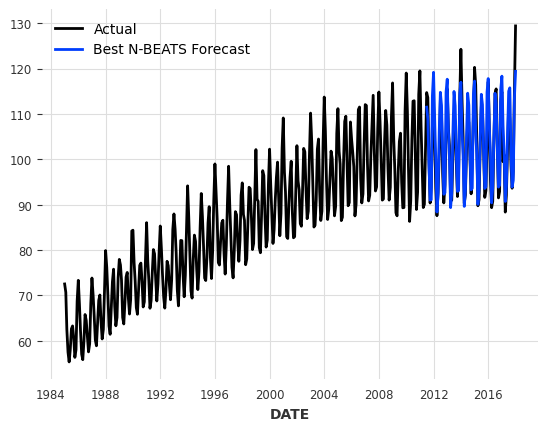

In [269]:
# Forecast with best model
best_forecast = best_model.predict(len(val))

series.plot(label="Actual")
best_forecast.plot(label="Best N-BEATS Forecast")

In [282]:
print(best_model.model_params)

OrderedDict([('output_chunk_shift', 0), ('generic_architecture', True), ('num_stacks', 30), ('num_blocks', 2), ('num_layers', 4), ('layer_widths', 256), ('expansion_coefficient_dim', 5), ('trend_polynomial_degree', 2), ('dropout', 0.0), ('activation', 'ReLU'), ('random_state', 42), ('input_chunk_length', 12), ('n_epochs', 100), ('output_chunk_length', 6)])


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 12.2 M | train
-------------------------------------------------------------
12.2 M    Trainable params
1.4 K     Non-trainable params
12.2 M    Total params
48.820    Total estimated model params size (MB)
726       Modules in train mode
0         Modules in eval mode


Epoch 99: 100%|██████████████████████████████████████████████████████| 11/11 [00:05<00:00,  1.99it/s, train_loss=4.190]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████████████████████████████████████████████████| 11/11 [00:05<00:00,  1.99it/s, train_loss=4.190]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.33it/s]


<Axes: xlabel='DATE'>

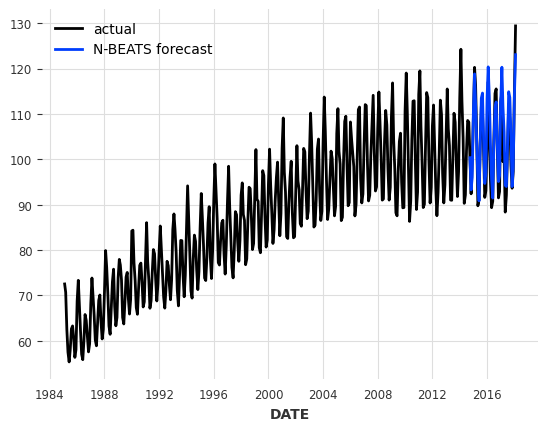

In [215]:
nbeats = NBEATSModel(
    input_chunk_length=12,   # use past 24 months
    output_chunk_length=12,  # predict next 12 months
    n_epochs=100,
    random_state=42,
    layer_widths=256,
    num_blocks=2,
    num_layers=4
)

nbeats.fit(train)
nbeats_forecast = nbeats.predict(len(val))

# Plot
series.plot(label="actual")
nbeats_forecast.plot(label="N-BEATS forecast")

In [217]:
from darts.metrics import rmse, mape, mae, r2_score as r2
rmse = rmse(val, nbeats_forecast)
mape = mape(val, nbeats_forecast)
mae = mae(val, nbeats_forecast)
r2 = r2(val, nbeats_forecast)
print("Test RMSE:", rmse)
print("Test MAPE:", mape)
print("Test MAE:", mae)
print("Test R2:", r2)

Test RMSE: 4.376003900646003
Test MAPE: 3.279676558601157
Test MAE: 3.3396905965029218
Test R2: 0.8104722763983846


In [219]:
from darts.metrics import rmse, mape, mae, r2_score as r2
results_novel["N-BEATS"] = {
    "RMSE": rmse(val, nbeats_forecast),
    "MAPE": mape(val, nbeats_forecast),
    "MAE": mae(val, nbeats_forecast),
    "R2": r2(val, nbeats_forecast)
}

### Model Diagnostic

In [225]:
from darts.metrics import mae, rmse
import matplotlib.pyplot as plt

# actual_series: your ground truth TimeSeries
# nbeats: your trained NBEATSModel
# train_series / val_series depending on your split

forecast = nbeats.predict(len(val))
residuals = val - forecast

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.31it/s]


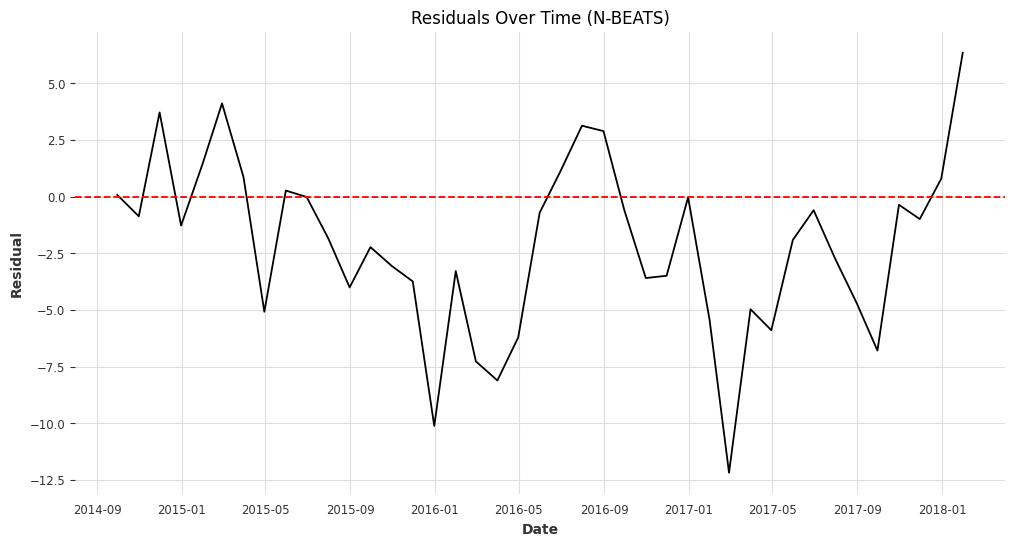

In [226]:
plt.figure(figsize=(12,6))
plt.plot(residuals.time_index, residuals.values(), color='black')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Over Time (N-BEATS)')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()

In [228]:
print("MAE:", mae(val, forecast))
print("RMSE:", rmse(val, forecast))

MAE: 3.3396905965029218
RMSE: 4.376003900646003


<Figure size 1200x400 with 0 Axes>

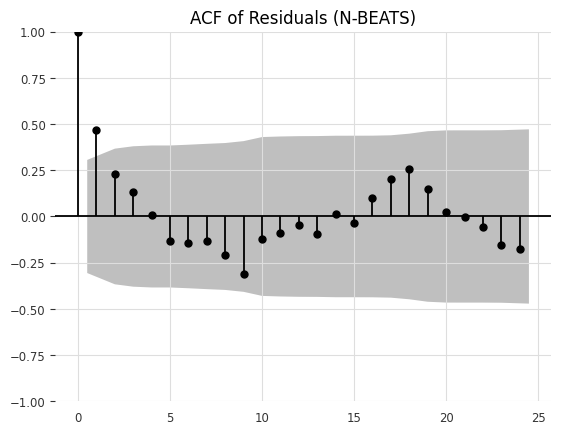

<Figure size 1200x400 with 0 Axes>

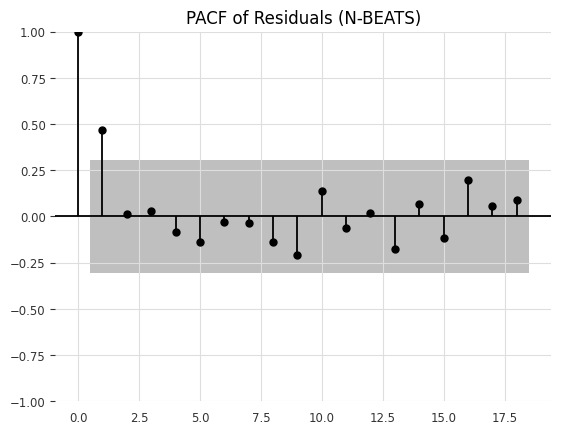

In [230]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

residual_series = pd.Series(residuals.values().flatten(), index=residuals.time_index)

plt.figure(figsize=(12,4))
plot_acf(residual_series, lags=24)
plt.title('ACF of Residuals (N-BEATS)')
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(residual_series, lags=18)
plt.title('PACF of Residuals (N-BEATS)')
plt.show()

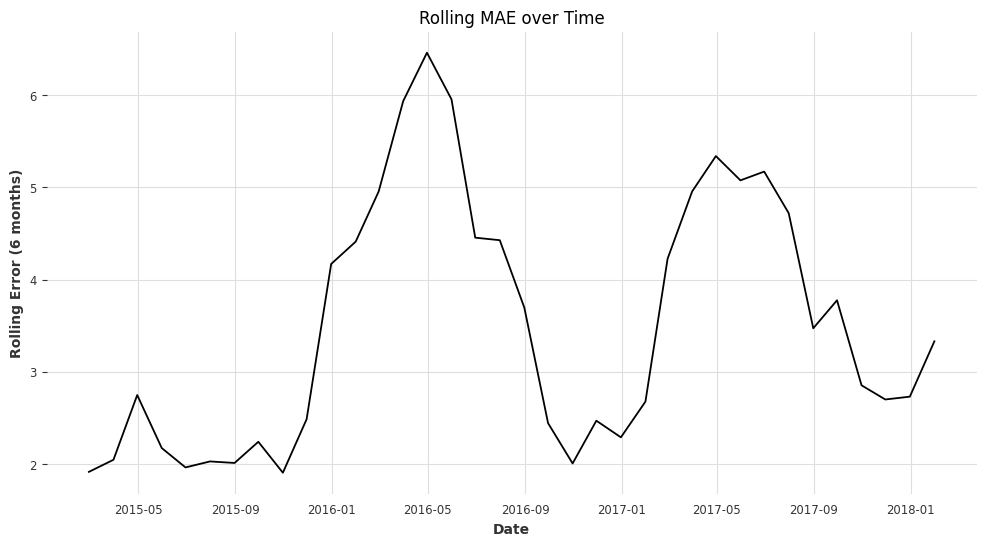

In [231]:
import numpy as np

rolling_error = np.abs(residual_series).rolling(window=6).mean()
plt.figure(figsize=(12,6))
plt.plot(rolling_error)
plt.title('Rolling MAE over Time')
plt.xlabel('Date')
plt.ylabel('Rolling Error (6 months)')
plt.show()

In [221]:
import pandas as pd
# Convert the results dictionary to a DataFrame
df = pd.DataFrame.from_dict(results, orient='index')
df = df.reset_index().rename(columns={'index': 'Model'})

# Display the table
print(df)
df.style.format({"RMSE": "{:.2f}", "MAPE": "{:.2f}%"})

     Model       RMSE       MAPE       MAE        R2  \
0   SARIMA   4.280879   0.030006  3.166880  0.831749   
1  PROPHET   4.254667   0.031319  3.268915  0.833803   
2  N-BEATS  15.262347  13.292041       NaN       NaN   

                                            forecast  
0                                                NaN  
1                                                NaN  
2  (((<TimeSeries (DataArray) (DATE: 1, component...  


,Model,RMSE,MAPE,MAE,R2,forecast
0,SARIMA,4.28,0.03%,3.166880,0.831749,nan
1,PROPHET,4.25,0.03%,3.268915,0.833803,nan
2,N-BEATS,15.26,13.29%,nan,nan,"Size: 328B array([[[106.7090101 ]], [[ 99.64185055]], [[102.54358625]], [[118.635257 ]], [[123.23110002]], [[115.6946455 ]], [[108.6951635 ]], [[101.89371689]], [[ 99.52020365]], [[107.18575704]], ... [[112.01010571]], [[112.88289714]], [[118.08956215]], [[126.14989288]], [[129.95197947]], [[125.34896969]], [[116.45124423]], [[118.99335775]], [[129.25816944]], [[134.29632456]]]) Coordinates: * DATE (DATE) datetime64[ns] 328B 2014-09-30 2014-10-31 ... 2018-01-31 * component (component) object 8B 'IPG2211A2N' Dimensions without coordinates: sample Attributes: static_covariates: None hierarchy: None metadata: None"


In [7]:
print("N-BEATS RMSE:", rmse(val, nbeats_forecast))
print("N-BEATS MAPE:", mape(val, nbeats_forecast))

N-BEATS RMSE: 15.262347489515532
N-BEATS MAPE: 13.292040535527125


# DEEP AR

In [10]:
from darts.models import RNNModel

deepar = RNNModel(
    model="LSTM",              # DeepAR-style recurrent net
    input_chunk_length=24,
    output_chunk_length=12,
    n_rnn_layers=2,
    hidden_dim=25,
    training_length=36,
    n_epochs=100,
    random_state=42
)

deepar.fit(train)
deepar_forecast = deepar.predict(len(val))

ignoring user defined `output_chunk_length`. RNNModel uses a fixed `output_chunk_length=1`.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 8.0 K  | train
6 | V               | Linear           | 26     | train
-------------------------------------------------------------
8.0 K     Trainable params
0         Non-trainable params
8.0 K     Total params
0.032     Total estimated model params size (MB)
7         Modules in train mode
0         Modul

Epoch 99: 100%|████████████████████████████████████████████████████| 10/10 [00:00<00:00, 46.36it/s, train_loss=3.94e+3]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|████████████████████████████████████████████████████| 10/10 [00:00<00:00, 45.93it/s, train_loss=3.94e+3]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.30it/s]


<Axes: xlabel='time'>

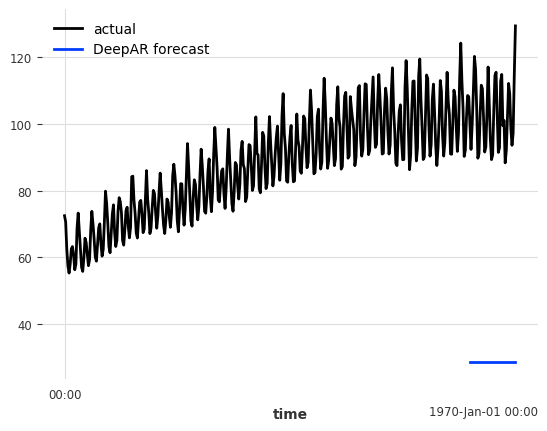

In [11]:
# Plot
series.plot(label="actual")
deepar_forecast.plot(label="DeepAR forecast")

In [12]:
print("DeepAR RMSE:", rmse(val, deepar_forecast))
print("DeepAR MAPE:", mape(val, deepar_forecast))

DeepAR RMSE: 75.03511930529027
DeepAR MAPE: 71.90967405960451


# N-HiTS

In [94]:
from darts.models.forecasting.nhits import NHiTSModel

nhits = NHiTSModel(
    input_chunk_length=24,
    output_chunk_length=12,
    n_epochs=100,
    random_state=42
)
nhits.fit(train)
nhits_forecast = nhits.predict(len(val))

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 837 K  | train
-------------------------------------------------------------
825 K     Trainable params
12.3 K    Non-trainable params
837 K     Total params
3.351     Total estimated model params size (MB)
42        Modules in train mode
0         Modules in eval mode


Epoch 99: 100%|██████████████████████████████████████████████████████| 11/11 [00:00<00:00, 39.45it/s, train_loss=19.90]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████████████████████████████████████████████████| 11/11 [00:00<00:00, 39.15it/s, train_loss=19.90]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 39.50it/s]


<Axes: xlabel='DATE'>

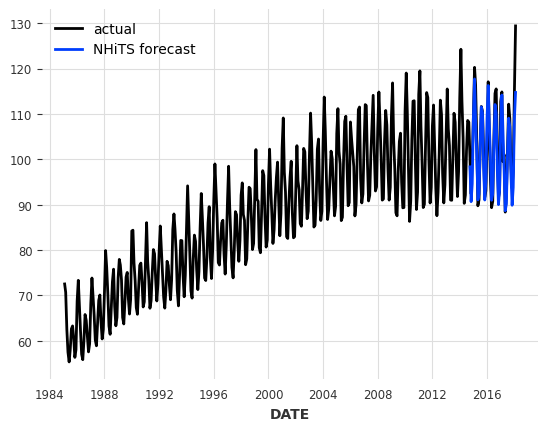

In [95]:
# Plot
series.plot(label="actual")
nhits_forecast.plot(label="NHiTS forecast")

In [98]:
print("NHiTS RMSE:", rmse(val, nhits_forecast))
print("NHiTS MAPE:", mape(val, nhits_forecast))

NHiTS RMSE: 3.9962440261743915
NHiTS MAPE: 2.73134447234652


In [103]:
from darts.metrics import rmse, mape, mae, r2_score as r2
results_novel["N-HiTS"] = {
    "RMSE": rmse(val, nhits_forecast),
    "MAPE": mape(val, nhits_forecast),
    "MAE": mae(val, nhits_forecast),
    "R2": r2(val, nhits_forecast),
}

### Hyperparameter Tuning

In [122]:
import pandas as pd
from darts import TimeSeries
from darts.models import NHiTSModel
from darts.utils.model_selection import train_test_split
from darts.metrics import mape
from sklearn.model_selection import ParameterGrid


# Prepare dataset
df3 = df.copy()
df3.index = pd.to_datetime(df3.index)
series = TimeSeries.from_series(df3['IPG2211A2N'])

# Split data
train, val = train_test_split(series, test_size=0.2)

# Define parameter grid
param_grid = {
    "input_chunk_length": [12, 24],
    "output_chunk_length": [6, 12],
    "num_blocks": [1, 2],
    "num_layers": [2, 4],
    "layer_widths": [256, 512],
    "n_epochs": [100],
}

# Manual grid search
results = []
best_score = float("inf")
best_model = None
best_params = None

for params in ParameterGrid(param_grid):
    print(f"Training with: {params}")
    try:
        model = NHiTSModel(random_state=42, **params)
        model.fit(train, verbose=False)
        pred = model.predict(len(val))
        score = mape(val, pred)
        results.append((params, score))
        print(f"MAPE: {score:.2f}")
        
        if score < best_score:
            best_score = score
            best_model = model
            best_params = params
    except Exception as e:
        print(f"⚠️ Skipping due to error: {e}")
        continue

print("\n✅ Best Parameters:", best_params)
print(f"📉 Best Validation MAPE: {best_score:.2f}")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training with: {'input_chunk_length': 12, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 2, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.88it/s]

GPU available: True (cuda), used: True



MAPE: 3.78
Training with: {'input_chunk_length': 12, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 2, 'output_chunk_length': 12}


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.10it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 3.98
Training with: {'input_chunk_length': 12, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 4, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.96it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 3.41
Training with: {'input_chunk_length': 12, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 4, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.75it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 2.63
Training with: {'input_chunk_length': 12, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 2, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.48it/s]
MAPE: 2.88
Training with: {'input_chunk_length': 12, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 2, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.35it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 3.86
Training with: {'input_chunk_length': 12, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 4, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.88it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 4.77
Training with: {'input_chunk_length': 12, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 4, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.78it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 4.68
Training with: {'input_chunk_length': 12, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 2, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.68it/s]
MAPE: 4.35
Training with: {'input_chunk_length': 12, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 2, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.50it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 3.70
Training with: {'input_chunk_length': 12, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 4, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.08it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 3.25
Training with: {'input_chunk_length': 12, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 4, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.47it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 4.03
Training with: {'input_chunk_length': 12, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 2, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.35it/s]
MAPE: 6.61
Training with: {'input_chunk_length': 12, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 2, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.42it/s]
MAPE: 4.96
Training with: {'input_chunk_length': 12, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 4, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.09it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 5.59
Training with: {'input_chunk_length': 12, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 4, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.95it/s]
MAPE: 2.87
Training with: {'input_chunk_length': 24, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 2, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.67it/s]
MAPE: 5.12
Training with: {'input_chunk_length': 24, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 2, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.66it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 4.21
Training with: {'input_chunk_length': 24, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 4, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.41it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 8.00
Training with: {'input_chunk_length': 24, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 4, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 23.02it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 3.76
Training with: {'input_chunk_length': 24, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 2, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.49it/s]
MAPE: 4.61
Training with: {'input_chunk_length': 24, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 2, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.16it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 4.81
Training with: {'input_chunk_length': 24, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 4, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.01it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 6.21
Training with: {'input_chunk_length': 24, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 4, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.59it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 3.07
Training with: {'input_chunk_length': 24, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 2, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.72it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 4.91
Training with: {'input_chunk_length': 24, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 2, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.33it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 2.97
Training with: {'input_chunk_length': 24, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 4, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.70it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 5.10
Training with: {'input_chunk_length': 24, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 4, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.83it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 4.13
Training with: {'input_chunk_length': 24, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 2, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.12it/s]
MAPE: 6.43
Training with: {'input_chunk_length': 24, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 2, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.88it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 7.98
Training with: {'input_chunk_length': 24, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 4, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.58it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 9.30
Training with: {'input_chunk_length': 24, 'layer_widths': 512, 'n_epochs': 100, 'num_blocks': 2, 'num_layers': 4, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.77it/s]
MAPE: 4.47

✅ Best Parameters: {'input_chunk_length': 12, 'layer_widths': 256, 'n_epochs': 100, 'num_blocks': 1, 'num_layers': 4, 'output_chunk_length': 12}
📉 Best Validation MAPE: 2.63


In [232]:
from darts.models.forecasting.nhits import NHiTSModel

nhits = NHiTSModel(
    input_chunk_length=12,
    output_chunk_length=12,
    layer_widths= 256,
    num_blocks= 1,
    num_layers= 4,
    n_epochs=100,
    random_state=42
)
nhits.fit(train)
nhits_forecast = nhits.predict(len(val))

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 608 K  | train
-------------------------------------------------------------
605 K     Trainable params
3.1 K     Non-trainable params
608 K     Total params
2.433     Total estimated model params size (MB)
54        Modules in train mode
0         Modules in eval mode


Epoch 99: 100%|██████████████████████████████████████████████████████| 11/11 [00:00<00:00, 24.95it/s, train_loss=9.650]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████████████████████████████████████████████████| 11/11 [00:00<00:00, 24.74it/s, train_loss=9.650]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.40it/s]


<Axes: xlabel='DATE'>

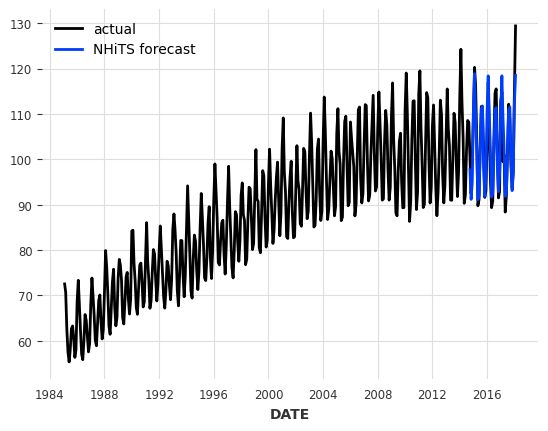

In [233]:
# Plot
series.plot(label="actual")
nhits_forecast.plot(label="NHiTS forecast")

In [234]:
print("NHiTS RMSE:", rmse(val, nhits_forecast))
print("NHiTS MAPE:", mape(val, nhits_forecast))

NHiTS RMSE: 3.70078014038868
NHiTS MAPE: 2.692632931340704


In [235]:
from darts.metrics import rmse, mape, mae, r2_score as r2
results_novel["N-HiTS"] = {
    "RMSE": rmse(val, nhits_forecast),
    "MAPE": mape(val, nhits_forecast),
    "MAE": mae(val, nhits_forecast),
    "R2": r2(val, nhits_forecast),
}

### Model Diagnostic

In [237]:
from darts.metrics import mae, rmse

forecast = nhits.predict(len(val))
residuals = val - forecast

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.59it/s]


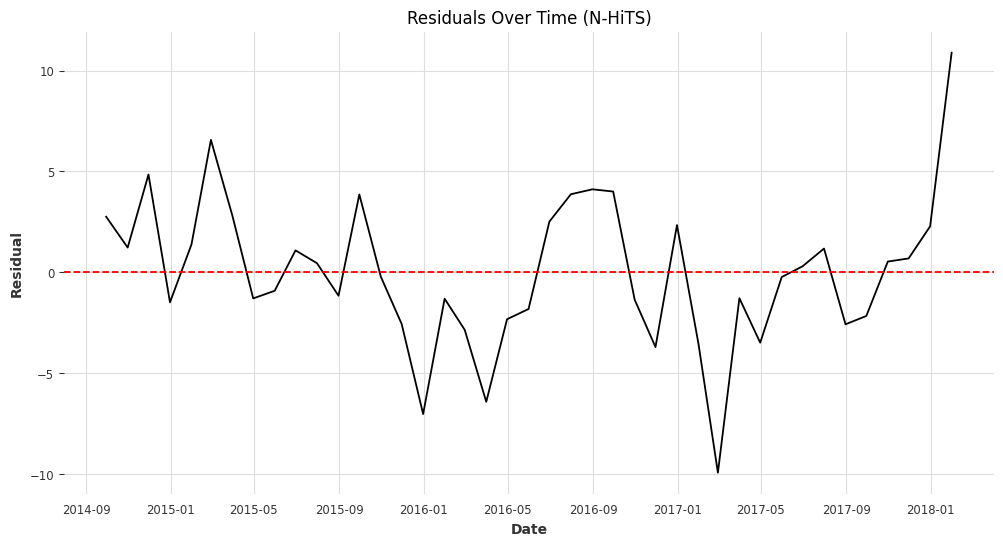

In [238]:
plt.figure(figsize=(12,6))
plt.plot(residuals.time_index, residuals.values(), color='black')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Over Time (N-HiTS)')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()

In [239]:
print("MAE:", mae(val, forecast))
print("RMSE:", rmse(val, forecast))

MAE: 2.8143396078794054
RMSE: 3.70078014038868


<Figure size 1200x400 with 0 Axes>

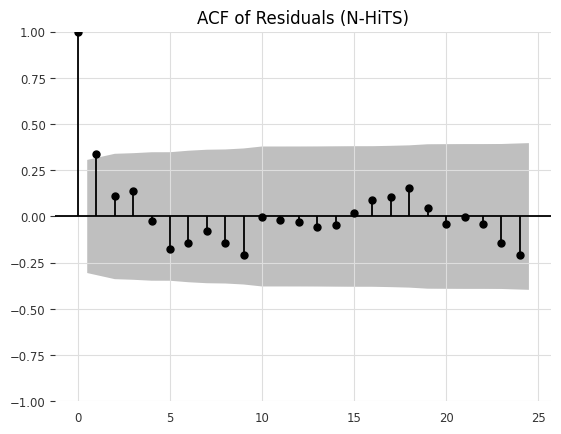

<Figure size 1200x400 with 0 Axes>

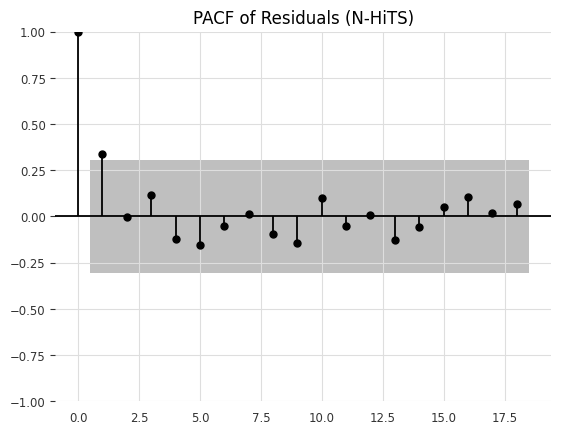

In [241]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

residual_series = pd.Series(residuals.values().flatten(), index=residuals.time_index)

plt.figure(figsize=(12,4))
plot_acf(residual_series, lags=24)
plt.title('ACF of Residuals (N-HiTS)')
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(residual_series, lags=18)
plt.title('PACF of Residuals (N-HiTS)')
plt.show()

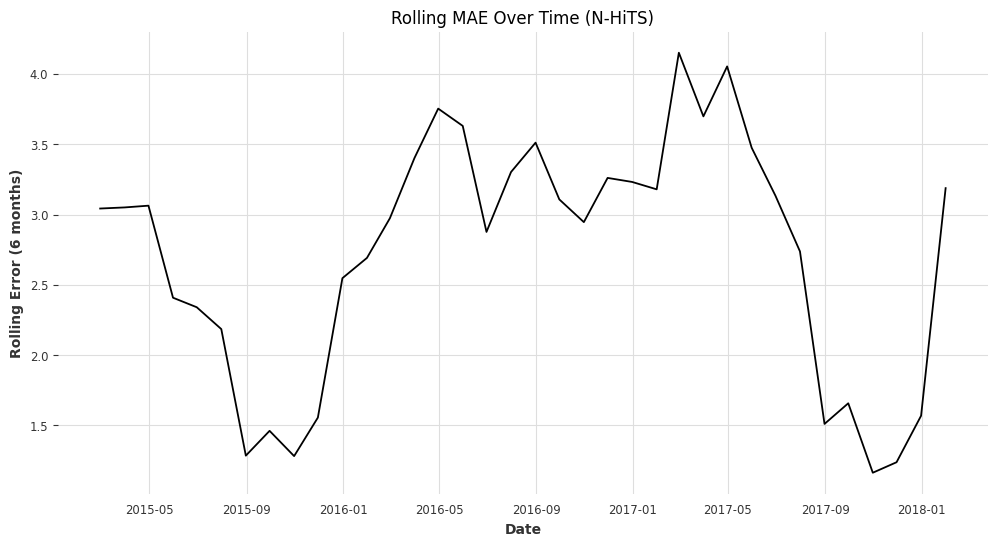

In [242]:
import numpy as np

rolling_error = abs(residual_series).rolling(window=6).mean()
plt.figure(figsize=(12,6))
plt.plot(rolling_error)
plt.title('Rolling MAE Over Time (N-HiTS)')
plt.xlabel('Date')
plt.ylabel('Rolling Error (6 months)')
plt.show()

# TFT

In [104]:
from darts.models import TFTModel

# Tell TFT to generate time-based covariates automatically
tft = TFTModel(
    input_chunk_length=24,
    output_chunk_length=12,
    hidden_size=16,
    n_epochs=100,
    random_state=42,
    add_relative_index=True,   # auto-generate relative index covariates
    add_encoders={"cyclic": {"future": ["month"]}}  # use month as seasonal covariate
)

tft.fit(train)
tft_forecast = tft.predict(len(val))

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0      | train
1  | val_metrics                       | MetricCollection                 | 0      | train
2  | input_embeddings                  | _MultiEmbedding                  | 0      | train
3  | static_covariates_vsn             | _VariableSelectionNetwork        | 0      | train
4  | encoder_vsn                       | _VariableSelectionNetwork        | 2.4 K  | train
5  | decoder_vsn                       | _VariableSelectionNetwork        | 1.8 K  | train
6  | static_context_grn                | _GatedResidualNetwork            | 1.1 K  | train
7  | static_cont

Epoch 99: 100%|██████████████████████████████████████████████████████| 11/11 [00:01<00:00,  8.14it/s, train_loss=98.30]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████████████████████████████████████████████████| 11/11 [00:01<00:00,  8.12it/s, train_loss=98.30]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.02it/s]


<Axes: xlabel='DATE'>

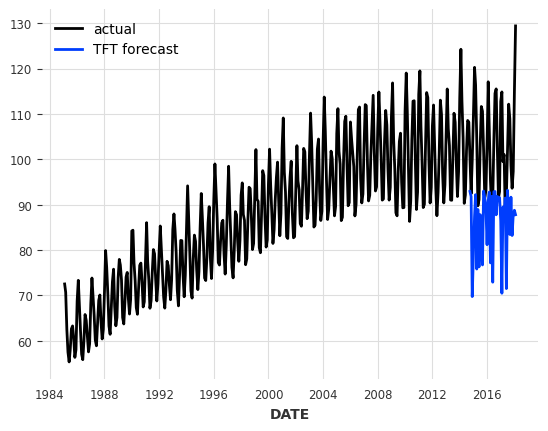

In [105]:
# Plot
series.plot(label="actual")
tft_forecast.plot(label="TFT forecast")

In [106]:
print("TFT RMSE:", rmse(val, tft_forecast))
print("TFT MAPE:", mape(val, tft_forecast))

TFT RMSE: 20.88403457445764
TFT MAPE: 16.018908743413064


In [108]:
results_novel["TFT"] = {
    "RMSE": rmse(val, tft_forecast),
    "MAPE": mape(val, tft_forecast),
    "MAE": mae(val, tft_forecast),
    "R2": r2(val, tft_forecast)
}

### Hyperparameter Tuning

In [132]:
import pandas as pd
from darts import TimeSeries
from darts.models import TFTModel
from darts.utils.model_selection import train_test_split
from darts.metrics import mape
from sklearn.model_selection import ParameterGrid

# Prepare dataset

df3 = df.copy()
df3.index = pd.to_datetime(df3.index)
series = TimeSeries.from_series(df3['IPG2211A2N'])

# Split data
train, val = train_test_split(series, test_size=0.2)

# Define parameter grid
param_grid = {
    "input_chunk_length": [12, 24],
    "output_chunk_length": [6, 12],
    "hidden_size": [8, 16, 32, 64],
    "dropout": [0.1, 0.2, 0.3, 0.4],
    "n_epochs": [100],
    "add_relative_index":[True], 
    "add_encoders":[{"cyclic": {"future": ["month"]}}]
}

# Manual grid search

results = []
best_score = float("inf")
best_model = None
best_params = None

for params in ParameterGrid(param_grid):
    print(f"Training with: {params}")
    try:
        model = TFTModel(random_state=42, **params)
        model.fit(train, verbose=False)
        pred = model.predict(len(val))
        score = mape(val, pred)
        results.append((params, score))
        print(f"MAPE: {score:.2f}")
        
        if score < best_score:
            best_score = score
            best_model = model
            best_params = params
    except Exception as e:
        print(f"⚠️ Skipping due to error: {e}")
        continue

print("\n✅ Best Parameters:", best_params)
print(f"📉 Best Validation MAPE: {best_score:.2f}")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.1, 'hidden_size': 8, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.11it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 56.00
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.1, 'hidden_size': 8, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.00it/s]

GPU available: True (cuda), used: True



MAPE: 56.00
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.1, 'hidden_size': 8, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 6}


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.72it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 55.99
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.1, 'hidden_size': 8, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.31it/s]

GPU available: True (cuda), used: True



MAPE: 63.48
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.1, 'hidden_size': 16, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 6}


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.46it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 23.76
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.1, 'hidden_size': 16, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.95it/s]
MAPE: 23.54
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.1, 'hidden_size': 16, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [21:08<00:00,  0.00it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 23.06
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.1, 'hidden_size': 16, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.71it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 30.37
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.1, 'hidden_size': 32, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.52it/s]

GPU available: True (cuda), used: True



MAPE: 7.56
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.1, 'hidden_size': 32, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 12}


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.15it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 17.32
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.1, 'hidden_size': 32, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.86it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 15.36
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.1, 'hidden_size': 32, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.84it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



MAPE: 10.64
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.1, 'hidden_size': 64, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 6}


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.68it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 4.72
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.1, 'hidden_size': 64, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.32it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 3.99
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.1, 'hidden_size': 64, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.08it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 5.29
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.1, 'hidden_size': 64, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.10it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 4.98
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.2, 'hidden_size': 8, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.62it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 55.93
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.2, 'hidden_size': 8, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.67it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 55.94
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.2, 'hidden_size': 8, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.07it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 55.91
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.2, 'hidden_size': 8, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.22it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 63.41
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.2, 'hidden_size': 16, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.52it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



MAPE: 23.82
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.2, 'hidden_size': 16, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 12}


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.50it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 23.63
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.2, 'hidden_size': 16, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.50it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 23.02
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.2, 'hidden_size': 16, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.75it/s]
MAPE: 30.31
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.2, 'hidden_size': 32, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.44it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 21.97
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.2, 'hidden_size': 32, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.25it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 17.31
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.2, 'hidden_size': 32, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.44it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 16.70
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.2, 'hidden_size': 32, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.27it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 9.10
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.2, 'hidden_size': 64, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.08it/s]

GPU available: True (cuda), used: True



MAPE: 5.00
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.2, 'hidden_size': 64, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 12}


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.69it/s]
MAPE: 4.92
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.2, 'hidden_size': 64, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.66it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



MAPE: 10.42
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.2, 'hidden_size': 64, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 12}


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.75it/s]
MAPE: 14.84
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.3, 'hidden_size': 8, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.73it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 55.87
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.3, 'hidden_size': 8, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.13it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 55.89
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.3, 'hidden_size': 8, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 55.84
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.3, 'hidden_size': 8, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.98it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 63.36
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.3, 'hidden_size': 16, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.40it/s]

GPU available: True (cuda), used: True



MAPE: 23.67
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.3, 'hidden_size': 16, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 12}


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.83it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 23.47
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.3, 'hidden_size': 16, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.97it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 22.91
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.3, 'hidden_size': 16, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.59it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 30.15
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.3, 'hidden_size': 32, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.51it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 15.30
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.3, 'hidden_size': 32, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.22it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



MAPE: 17.53
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.3, 'hidden_size': 32, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 6}


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.42it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 11.56
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.3, 'hidden_size': 32, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.83it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 11.46
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.3, 'hidden_size': 64, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.67it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



MAPE: 5.46
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.3, 'hidden_size': 64, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 12}


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.71it/s]

GPU available: True (cuda), used: True



MAPE: 4.33
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.3, 'hidden_size': 64, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 6}


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.70it/s]
MAPE: 5.36
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.3, 'hidden_size': 64, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 12}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.55it/s]
MAPE: 9.06
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.4, 'hidden_size': 8, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 6}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.23it/s]

GPU available: True (cuda), used: True



MAPE: 55.80
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.4, 'hidden_size': 8, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 12}


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.86it/s]

GPU available: True (cuda), used: True



MAPE: 55.83
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.4, 'hidden_size': 8, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 6}


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.50it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 55.76
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.4, 'hidden_size': 8, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.89it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 63.29
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.4, 'hidden_size': 16, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.62it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 23.65
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.4, 'hidden_size': 16, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.21it/s]

GPU available: True (cuda), used: True



MAPE: 23.45
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.4, 'hidden_size': 16, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 6}


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.26it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores



MAPE: 22.90
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.4, 'hidden_size': 16, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 12}


HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.56it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 30.12
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.4, 'hidden_size': 32, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.56it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 17.43
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.4, 'hidden_size': 32, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.45it/s]

GPU available: True (cuda), used: True



MAPE: 26.07
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.4, 'hidden_size': 32, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 6}


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 15.20
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.4, 'hidden_size': 32, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.85it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 16.00
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.4, 'hidden_size': 64, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 6}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.56it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



MAPE: 5.10
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.4, 'hidden_size': 64, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 12}


`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.04it/s]

GPU available: True (cuda), used: True



MAPE: 4.90
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.4, 'hidden_size': 64, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 6}


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.45it/s]

GPU available: True (cuda), used: True



MAPE: 7.09
Training with: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.4, 'hidden_size': 64, 'input_chunk_length': 24, 'n_epochs': 100, 'output_chunk_length': 12}


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.01it/s]
MAPE: 7.38

✅ Best Parameters: {'add_encoders': {'cyclic': {'future': ['month']}}, 'add_relative_index': True, 'dropout': 0.1, 'hidden_size': 64, 'input_chunk_length': 12, 'n_epochs': 100, 'output_chunk_length': 12}
📉 Best Validation MAPE: 3.99


In [243]:
from darts.models import TFTModel

# Tell TFT to generate time-based covariates automatically
tft = TFTModel(
    input_chunk_length=12,
    output_chunk_length=12,
    hidden_size=64,
    dropout= 0.1,
    n_epochs=100,
    random_state=42,
    add_relative_index=True,   # auto-generate relative index covariates
    add_encoders={"cyclic": {"future": ["month"]}}  # use month as seasonal covariate
)

tft.fit(train)
tft_forecast = tft.predict(len(val))

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0      | train
1  | val_metrics                       | MetricCollection                 | 0      | train
2  | input_embeddings                  | _MultiEmbedding                  | 0      | train
3  | static_covariates_vsn             | _VariableSelectionNetwork        | 0      | train
4  | encoder_vsn                       | _VariableSelectionNetwork        | 7.0 K  | train
5  | decoder_vsn                       | _VariableSelectionNetwork        | 5.2 K  | train
6  | static_context_grn                | _GatedResidualNetwork            | 16.8 K | train
7  | static_cont

Epoch 99: 100%|██████████████████████████████████████████████████████| 11/11 [00:01<00:00,  7.81it/s, train_loss=10.40]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████████████████████████████████████████████████| 11/11 [00:01<00:00,  7.77it/s, train_loss=10.40]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.73it/s]


<Axes: xlabel='DATE'>

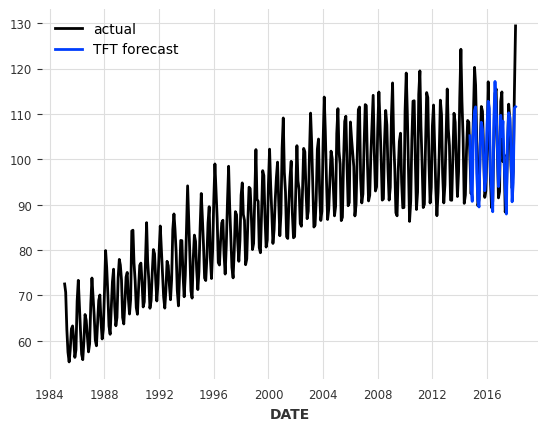

In [244]:
# Plot
series.plot(label="actual")
tft_forecast.plot(label="TFT forecast")

In [245]:
print("TFT RMSE:", rmse(val, tft_forecast))
print("TFT MAPE:", mape(val, tft_forecast))

TFT RMSE: 5.134259645237587
TFT MAPE: 3.76035122476645


In [246]:
results_novel["TFT"] = {
    "RMSE": rmse(val, tft_forecast),
    "MAPE": mape(val, tft_forecast),
    "MAE": mae(val, tft_forecast),
    "R2": r2(val, tft_forecast)
}

### Model diagnostic

In [248]:
from darts.metrics import mae, rmse

forecast = tft.predict(len(val))
residuals = val - forecast

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.59it/s]


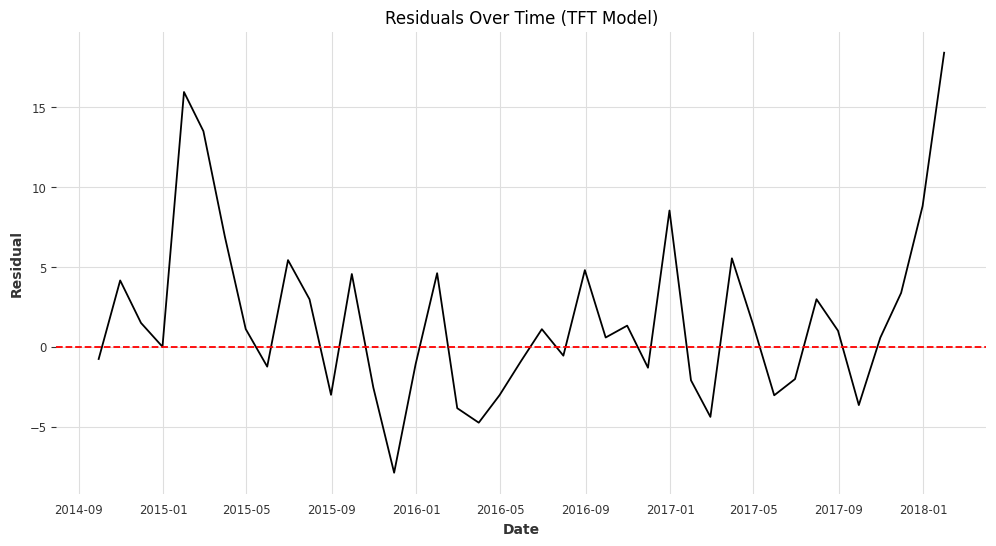

In [249]:
plt.figure(figsize=(12,6))
plt.plot(residuals.time_index, residuals.values(), color='black')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Over Time (TFT Model)')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()

In [251]:
print("MAE:", mae(val, forecast))
print("RMSE:", rmse(val, forecast))

MAE: 4.027182359076537
RMSE: 5.703058613660222


<Figure size 1200x400 with 0 Axes>

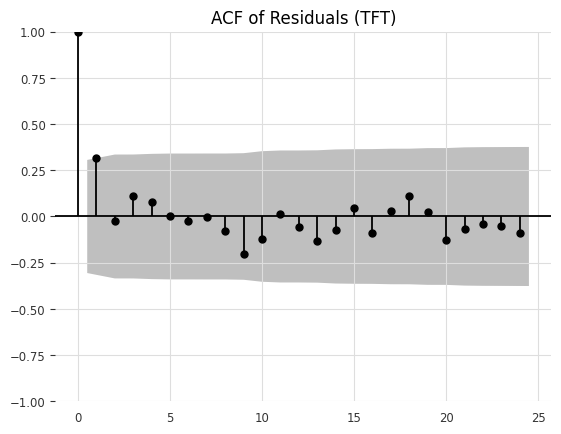

<Figure size 1200x400 with 0 Axes>

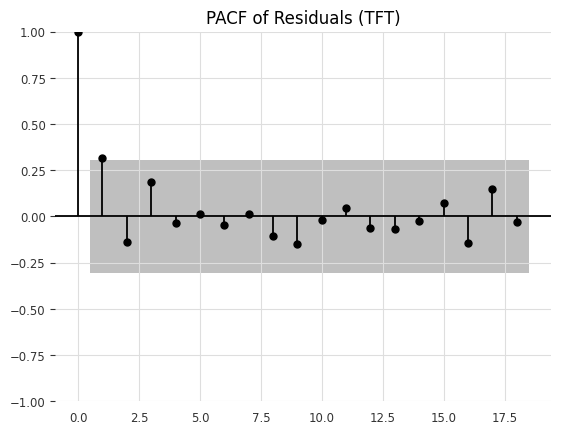

In [253]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

residual_series = pd.Series(residuals.values().flatten(), index=residuals.time_index)

plt.figure(figsize=(12,4))
plot_acf(residual_series, lags=24)
plt.title('ACF of Residuals (TFT)')
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(residual_series, lags=18)
plt.title('PACF of Residuals (TFT)')
plt.show()

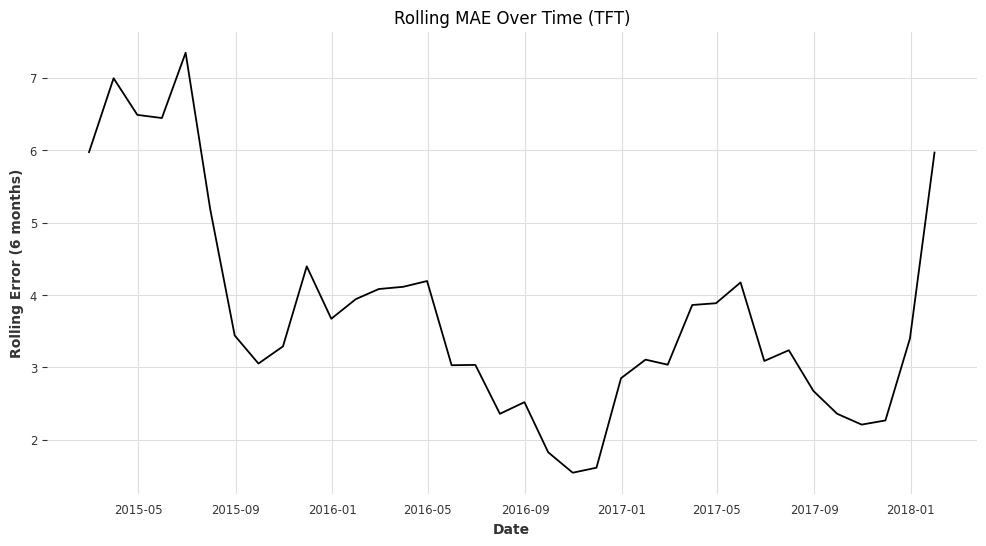

In [254]:
import numpy as np

rolling_error = abs(residual_series).rolling(window=6).mean()
plt.figure(figsize=(12,6))
plt.plot(rolling_error)
plt.title('Rolling MAE Over Time (TFT)')
plt.xlabel('Date')
plt.ylabel('Rolling Error (6 months)')
plt.show()

# LSTM

In [33]:
import torch
torch.cuda.is_available()

True

In [34]:
from darts.timeseries import TimeSeries
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel

In [35]:
from sklearn.model_selection import ParameterGrid

In [36]:
# Prepare the Time Series Objects for the target variable and the covariates
series = TimeSeries.from_series(df.IPG2211A2N)
covariates = TimeSeries.from_dataframe(df.iloc[:,1:])
covariates

<TimeSeries (DataArray) (DATE: 397, component: 7, sample: 1)> Size: 22kB
array([[[ 72.5052],
        [  1.    ],
        [  1.    ],
        ...,
        [  1.    ],
        [  1.    ],
        [  0.    ]],

       [[ 70.672 ],
        [  1.    ],
        [  2.    ],
        ...,
        [  4.    ],
        [  5.    ],
        [  0.    ]],

       [[ 62.4502],
        [  1.    ],
        [  3.    ],
        ...,
...
        ...,
        [  2.    ],
        [ 44.    ],
        [  0.    ]],

       [[114.7212],
        [  1.    ],
        [ 12.    ],
        ...,
        [  4.    ],
        [ 48.    ],
        [  0.    ]],

       [[129.4048],
        [  1.    ],
        [  1.    ],
        ...,
        [  0.    ],
        [  1.    ],
        [  0.    ]]], shape=(397, 7, 1))
Coordinates:
  * DATE       (DATE) datetime64[ns] 3kB 1985-01-31 1985-02-28 ... 2018-01-31
  * component  (component) <U11 308B 'IPG2211A2N' 'Days' ... 'Week' 'Weekend'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

In [37]:
# Create time series instances

# Year
year_series = datetime_attribute_timeseries(
    pd.date_range(start = series.start_time(),
                  freq = series.freq_str,
                  periods = df.shape[0]),
                  attribute = "year",
                  one_hot = False)

# Month
month_series = datetime_attribute_timeseries(year_series,
                                             attribute = "month",
                                             one_hot = True)

# Weekday
weekday_series = datetime_attribute_timeseries(year_series,
                                             attribute = "weekday",
                                             one_hot = True)

# Preview
weekday_series

<TimeSeries (DataArray) (time: 397, component: 7, sample: 1)> Size: 22kB
array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
...
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [1.]],

       [[0.],
        [0.],
        [1.],
        ...,
        [0.],
        [0.],
        [0.]]], shape=(397, 7, 1))
Coordinates:
  * time       (time) datetime64[ns] 3kB 1985-01-31 1985-02-28 ... 2018-01-31
  * component  (component) <U9 252B 'weekday_0' 'weekday_1' ... 'weekday_6'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

In [38]:
# Import the Scaler class and initialize two instances of it
scaler1 = Scaler()
scaler2 = Scaler()

In [39]:
# Apply the scaler to the time series
y_transformed = scaler1.fit_transform(series) #reduce the fluctuations for better fit with LSTM

In [40]:
# Scale the covariates with additional datetime attributes

# Stack the year_series attribute with the covariates
covariates = covariates.stack(year_series)
# Apply scaling to the covariates
covariates_transformed = scaler2.fit_transform(covariates)
# Stack the month_series attribute with the already scaled covariates
covariates_transformed = covariates_transformed.stack(month_series)
# Stack the weekday_series attribute with the already scaled covariates
covariates_transformed = covariates_transformed.stack(weekday_series)

# Display
covariates_transformed

<TimeSeries (DataArray) (DATE: 397, component: 27, sample: 1)> Size: 86kB
array([[[0.23201741],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.20727443],
        [0.        ],
        [0.09090909],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.09630353],
        [0.        ],
        [0.18181818],
        ...,
...
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.80181321],
        [0.        ],
        [1.        ],
        ...,
        [0.        ],
        [0.        ],
        [1.        ]],

       [[1.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]], shape=(397, 27, 1))
Coordinates:
  * DATE       (DATE) datetime64[ns] 3kB 1985-01-31 1985-02-28 ... 2018-01-31
  * component  (component) object 216B 'IPG2211A2N' 'Days' ... 'weekday_6'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

In [41]:
forecasting_horizon = 31  # Number of periods to forecast into the future
input_chunk_length = 46  # Number of past periods used for making predictions

training_length = forecasting_horizon + input_chunk_length  # Total length of the training window

In [42]:
# Initialize the LSTM model with specified parameters
model = RNNModel(model = "LSTM",                        # Specify LSTM as the type of RNN model
                 hidden_dim = 20,                       # Set the number of hidden units in LSTM layers
                 n_rnn_layers = 2,                      # Define the number of RNN layers
                 dropout = 0.1,                         # Set dropout rate for regularization
                 n_epochs = 10,                         # Define the number of training epochs
                 optimizer_kwargs = {"lr": 0.003},      # Specify learning rate for the optimizer
                 random_state = 1502,                   # Set random seed for reproducibility
                 training_length = training_length,     # Set the length of the training data
                 input_chunk_length = input_chunk_length,     # Set the length of input chunks for the model
                 # pl_trainer_kwargs = {"accelerator": "cpu"}   # Specify training on CPU
                 pl_trainer_kwargs = {"accelerator": "gpu",
                                      "devices": [0]}
                 )
#pl_trainer_kwargs={"accelerator": "gpu", "devices": 1}
#pl_trainer_kwargs={"accelerator": "cpu"} 
# Fit the model with transformed target data and covariates
model.fit(y_transformed, future_covariates = covariates_transformed)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V       

Epoch 9: 100%|█████████████████████████████████████████████████████| 10/10 [00:00<00:00, 29.30it/s, train_loss=0.00281]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|█████████████████████████████████████████████████████| 10/10 [00:00<00:00, 28.87it/s, train_loss=0.00281]


RNNModel(model=LSTM, hidden_dim=20, n_rnn_layers=2, dropout=0.1, training_length=77, n_epochs=10, optimizer_kwargs={'lr': 0.003}, random_state=1502, input_chunk_length=46, pl_trainer_kwargs={'accelerator': 'gpu', 'devices': [0]})

In [259]:
# Perform cross-validation with a rolling forecasting window
cv = model.historical_forecasts(series = y_transformed,       # Provide the transformed time series data
                                future_covariates = covariates_transformed, # Provide the transformed covariates
                                start = df.shape[0] - 180,    # Set the starting point for forecasting window
                                forecast_horizon = forecasting_horizon, # Define the number of time steps to forecast ahead
                                stride = 16,                 # Set the stride (step size) for rolling window
                                retrain = True,              # Specify whether to retrain the model at each step
                                last_points_only = False)    # Specify whether to use only the last points for validation

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | trai

Epoch 9: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 24.39it/s, train_loss=0.00645]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 24.23it/s, train_loss=0.00645]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 9: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 25.96it/s, train_loss=0.00883]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 25.55it/s, train_loss=0.00883]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in

Epoch 9: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 18.48it/s, train_loss=0.00606]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 18.25it/s, train_loss=0.00606]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 9: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 20.51it/s, train_loss=0.00609]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 20.39it/s, train_loss=0.00609]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 9: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 19.80it/s, train_loss=0.00537]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 19.64it/s, train_loss=0.00537]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 9: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 35.85it/s, train_loss=0.0045]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 35.73it/s, train_loss=0.0045]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.50it/s, train_loss=0.00374]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.36it/s, train_loss=0.00374]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in

Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 20.27it/s, train_loss=0.00404]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 20.19it/s, train_loss=0.00404]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 9: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 24.46it/s, train_loss=0.00234]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 24.25it/s, train_loss=0.00234]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 9: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 22.37it/s, train_loss=0.00251]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 22.27it/s, train_loss=0.00251]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [260]:
import pandas as pd

rmse_cv = []

for i in range(len(cv)):
    # Inverse transform forecasted TimeSeries
    predictions_ts = scaler1.inverse_transform(cv[i])

    # Convert predictions TimeSeries to pandas Series
    predictions = pd.Series(
        predictions_ts.values().squeeze(),
        index=predictions_ts.time_index  # ✅ property, not method
    )

    # Get date range of predictions
    start = predictions.index.min()
    end = predictions.index.max()

    # Extract actuals from original pandas Series df.y
    actuals = df.IPG2211A2N[start:end]  # ✅ this works because df.y is pandas Series

    # Calculate RMSE for this fold
    error_cv = np.sqrt(mean_squared_error(actuals, predictions))
    rmse_cv.append(error_cv)

# Print average RMSE
print(np.mean(rmse_cv))

7.839330856909394


### Hyperparameter Tuning

In [45]:
# Define the parameter grid for tuning
param_grid = {'n_rnn_layers': [1, 2],                 # Number of RNN layers to test
              'hidden_dim': [10, 20],                 # Number of hidden units in the LSTM layers
              'dropout': [0.1, 0.2],                  # Dropout rates to test
              'n_epochs': [5, 10],                    # Number of epochs for training
              'lr': [0.003],                          # Learning rates to test
              'training_length': [77],                # Training length to use
              'input_chunk_length': [46]}             # Length of input chunks to use

# Generate all combinations of the parameters
grid = ParameterGrid(param_grid)

# Get the total number of parameter combinations
len(list(grid))

16

In [52]:
# Initialize a list to store RMSE values for each parameter combination
rmse = []

# Iterate over each parameter combination in the grid
for params in grid:
    # Build the LSTM model with the current set of parameters
    model = RNNModel(
        model="LSTM",
        hidden_dim=params['hidden_dim'],
        n_rnn_layers=params['n_rnn_layers'],
        dropout=params['dropout'],
        n_epochs=params['n_epochs'],
        optimizer_kwargs={"lr": params['lr']},
        random_state=1502,
        training_length=params['training_length'],
        input_chunk_length=params['input_chunk_length'],
        pl_trainer_kwargs={"accelerator": "gpu", "devices": 1}  # or "auto"
    )

    # Fit the model
    model.fit(y_transformed, future_covariates=covariates_transformed)

    # Cross-validation
    cv = model.historical_forecasts(
        series=y_transformed,
        future_covariates=covariates_transformed,
        start=df.shape[0] - 180,
        forecast_horizon=forecasting_horizon,
        stride=16,
        retrain=True,
        last_points_only=False
    )

    # Evaluate predictions
    rmse_cv = []

    for i in range(len(cv)):
        # Inverse transform and convert to Series
        predictions_ts = scaler1.inverse_transform(cv[i])
        predictions = pd.Series(predictions_ts.values().squeeze(),
                                index=predictions_ts.time_index)

        # Get actuals
        start = predictions.index.min()
        end = predictions.index.max()
        actuals = df.IPG2211A2N[start:end]

        # Calculate RMSE
        error_cv = np.sqrt(mean_squared_error(actuals, predictions))
        rmse_cv.append(error_cv)

    # Store average RMSE for this parameter set
    error = np.mean(rmse_cv)
    rmse.append(error)

# Build final results DataFrame
tuning_results = pd.DataFrame(grid)
tuning_results['rmse'] = rmse
tuning_results

D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  | train
6 | V               | Linear           | 11     | train
--------------------------------------------------------

Epoch 4: 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 42.28it/s, train_loss=0.0188]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 41.65it/s, train_loss=0.0188]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  | train
6 | V               | Linear           | 11     | train
--------------------------------------------------------

Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 28.71it/s, train_loss=0.0203]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 28.01it/s, train_loss=0.0203]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 28.38it/s, train_loss=0.0272]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 27.67it/s, train_loss=0.0272]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 42.84it/s, train_loss=0.0179]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 42.35it/s, train_loss=0.0179]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  |

Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 46.21it/s, train_loss=0.0172]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 45.36it/s, train_loss=0.0172]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  |

Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 44.67it/s, train_loss=0.0182]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 44.10it/s, train_loss=0.0182]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  |

Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 50.18it/s, train_loss=0.0187]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 49.88it/s, train_loss=0.0187]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  |

Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.95it/s, train_loss=0.0162]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.53it/s, train_loss=0.0162]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 33.17it/s, train_loss=0.0176]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.93it/s, train_loss=0.0176]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 47.87it/s, train_loss=0.0162]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 47.30it/s, train_loss=0.0162]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 47.72it/s, train_loss=0.0228]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 47.72it/s, train_loss=0.0228]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated mode

Epoch 4: 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 31.09it/s, train_loss=0.0332]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 30.90it/s, train_loss=0.0332]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 34.29it/s, train_loss=0.0209]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 33.42it/s, train_loss=0.0209]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mod

Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 35.77it/s, train_loss=0.0269]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 35.53it/s, train_loss=0.0269]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in

Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 23.18it/s, train_loss=0.0204]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 22.77it/s, train_loss=0.0204]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated mode

Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 23.60it/s, train_loss=0.0276]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 23.41it/s, train_loss=0.0276]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in

Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 28.18it/s, train_loss=0.0234]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 27.91it/s, train_loss=0.0234]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated mode

Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 23.96it/s, train_loss=0.0257]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 23.79it/s, train_loss=0.0257]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in

Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 25.71it/s, train_loss=0.0284]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 25.54it/s, train_loss=0.0284]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in

Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 33.22it/s, train_loss=0.0251]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.72it/s, train_loss=0.0251]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 33.55it/s, train_loss=0.0367]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 33.26it/s, train_loss=0.0367]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mod

Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 28.25it/s, train_loss=0.0361]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 28.01it/s, train_loss=0.0361]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  |

Epoch 9: 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 36.91it/s, train_loss=0.0063]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 36.70it/s, train_loss=0.0063]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | 

Epoch 9: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 37.63it/s, train_loss=0.0101]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 36.44it/s, train_loss=0.0101]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 27.05it/s, train_loss=0.0116]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 26.53it/s, train_loss=0.0116]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 46.94it/s, train_loss=0.0138]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 46.30it/s, train_loss=0.0138]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  |

Epoch 9: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 42.44it/s, train_loss=0.0117]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 41.77it/s, train_loss=0.0117]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 37.82it/s, train_loss=0.0101]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 37.21it/s, train_loss=0.0101]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 40.08it/s, train_loss=0.0121]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 39.79it/s, train_loss=0.0121]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  |

Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 27.96it/s, train_loss=0.00955]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 27.75it/s, train_loss=0.00955]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  |

Epoch 9: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 41.09it/s, train_loss=0.0108]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 41.09it/s, train_loss=0.0108]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 39.32it/s, train_loss=0.0093]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 39.32it/s, train_loss=0.0093]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 33.29it/s, train_loss=0.0111]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 33.09it/s, train_loss=0.0111]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in

Epoch 9: 100%|███████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.53it/s, train_loss=0.020]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.33it/s, train_loss=0.020]


`enable_optimization=True` is ignored because `retrain` is not `False` or `0`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | trai

Epoch 9: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 33.97it/s, train_loss=0.0171]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 33.97it/s, train_loss=0.0171]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated mode

Epoch 9: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 21.60it/s, train_loss=0.0171]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 21.39it/s, train_loss=0.0171]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 9: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 18.66it/s, train_loss=0.0192]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 18.43it/s, train_loss=0.0192]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated mode

Epoch 9: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 19.95it/s, train_loss=0.0221]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 19.70it/s, train_loss=0.0221]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated mode

Epoch 9: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 26.67it/s, train_loss=0.0256]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 26.67it/s, train_loss=0.0256]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in

Epoch 9: 100%|█████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 16.93it/s, train_loss=0.025]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|█████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 16.53it/s, train_loss=0.025]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated mode

Epoch 9: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 26.04it/s, train_loss=0.0266]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 25.84it/s, train_loss=0.0266]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated mode

Epoch 9: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.28it/s, train_loss=0.0226]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.09it/s, train_loss=0.0226]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 9: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 19.40it/s, train_loss=0.0237]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 19.26it/s, train_loss=0.0237]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated mode

Epoch 9: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 28.69it/s, train_loss=0.0236]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 28.50it/s, train_loss=0.0236]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 4.0 K  |

Epoch 4: 100%|█████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.65it/s, train_loss=0.00798]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|█████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.36it/s, train_loss=0.00798]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 4.0 K  | train
6 | V               | Linear           | 21     | train
--------------------------------------------------------

Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 38.73it/s, train_loss=0.0151]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 37.02it/s, train_loss=0.0151]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 37.05it/s, train_loss=0.0124]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 37.05it/s, train_loss=0.0124]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 39.18it/s, train_loss=0.0109]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 38.18it/s, train_loss=0.0109]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 4.0 K  |

Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 47.51it/s, train_loss=0.0117]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 46.69it/s, train_loss=0.0117]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 4.0 K  |

Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 44.42it/s, train_loss=0.0115]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 43.47it/s, train_loss=0.0115]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 45.50it/s, train_loss=0.00975]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 44.46it/s, train_loss=0.00975]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 4.0 K  |

Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 43.23it/s, train_loss=0.0132]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 42.88it/s, train_loss=0.0132]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 4.0 K  |

Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 44.95it/s, train_loss=0.0125]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 44.35it/s, train_loss=0.0125]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 4.0 K  |

Epoch 4: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 41.81it/s, train_loss=0.00961]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 41.49it/s, train_loss=0.00961]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 4.0 K  |

Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 42.37it/s, train_loss=0.0104]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 41.83it/s, train_loss=0.0104]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in

Epoch 4: 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 26.42it/s, train_loss=0.0153]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 26.31it/s, train_loss=0.0153]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 26.27it/s, train_loss=0.0175]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 26.01it/s, train_loss=0.0175]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in

Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 23.49it/s, train_loss=0.0173]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 23.20it/s, train_loss=0.0173]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in

Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 18.59it/s, train_loss=0.0137]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 18.34it/s, train_loss=0.0137]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 30.69it/s, train_loss=0.0166]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 30.28it/s, train_loss=0.0166]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 25.34it/s, train_loss=0.0224]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 25.10it/s, train_loss=0.0224]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in

Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 29.38it/s, train_loss=0.0188]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 28.41it/s, train_loss=0.0188]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 25.69it/s, train_loss=0.0228]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 25.53it/s, train_loss=0.0228]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in

Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 30.18it/s, train_loss=0.0233]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 29.99it/s, train_loss=0.0233]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in

Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 27.56it/s, train_loss=0.0142]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 27.29it/s, train_loss=0.0142]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in

Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 26.09it/s, train_loss=0.0172]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 25.83it/s, train_loss=0.0172]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 4.0 K  |

Epoch 9: 100%|█████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.93it/s, train_loss=0.00252]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|█████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.38it/s, train_loss=0.00252]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 4.0 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
4.0 K     Trainable params
0         Non-trainable params
4.0 K     Total params
0.016     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 9: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 56.20it/s, train_loss=0.00467]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 52.42it/s, train_loss=0.00467]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 45.01it/s, train_loss=0.00544]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 45.01it/s, train_loss=0.00544]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 4.0 K  |

Epoch 9: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 45.72it/s, train_loss=0.00354]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 44.83it/s, train_loss=0.00354]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 39.33it/s, train_loss=0.00423]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 39.07it/s, train_loss=0.00423]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 4.0 K  |

Epoch 9: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 36.00it/s, train_loss=0.00234]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 36.00it/s, train_loss=0.00234]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 4.0 K  |

Epoch 9: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 43.79it/s, train_loss=0.00259]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 43.25it/s, train_loss=0.00259]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 4.0 K  |

Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 37.67it/s, train_loss=0.00192]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 37.31it/s, train_loss=0.00192]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 47.34it/s, train_loss=0.00224]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 47.34it/s, train_loss=0.00224]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 4.0 K  |

Epoch 9: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 21.82it/s, train_loss=0.00191]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 21.69it/s, train_loss=0.00191]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 27.96it/s, train_loss=0.00267]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 27.61it/s, train_loss=0.00267]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 9: 100%|█████████████████████████████████████████████████████| 10/10 [00:00<00:00, 25.26it/s, train_loss=0.00281]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|█████████████████████████████████████████████████████| 10/10 [00:00<00:00, 25.07it/s, train_loss=0.00281]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 9: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 30.19it/s, train_loss=0.00673]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 29.75it/s, train_loss=0.00673]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 9: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 16.53it/s, train_loss=0.00914]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 16.28it/s, train_loss=0.00914]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 9: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 32.73it/s, train_loss=0.00625]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 32.46it/s, train_loss=0.00625]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 9: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 19.66it/s, train_loss=0.00642]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 19.43it/s, train_loss=0.00642]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 9: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 31.40it/s, train_loss=0.00531]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 31.06it/s, train_loss=0.00531]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in

Epoch 9: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 35.27it/s, train_loss=0.00456]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 34.83it/s, train_loss=0.00456]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in

Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 25.79it/s, train_loss=0.00378]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 25.48it/s, train_loss=0.00378]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 27.07it/s, train_loss=0.00394]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 26.91it/s, train_loss=0.00394]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 9: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 26.03it/s, train_loss=0.00231]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 25.82it/s, train_loss=0.00231]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in

Epoch 9: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 20.34it/s, train_loss=0.00243]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 20.27it/s, train_loss=0.00243]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  |

Epoch 4: 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 39.85it/s, train_loss=0.0188]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 39.39it/s, train_loss=0.0188]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  | train
6 | V               | Linear           | 11     | train
--------------------------------------------------------

Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 36.21it/s, train_loss=0.0203]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 35.54it/s, train_loss=0.0203]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  |

Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 31.51it/s, train_loss=0.0272]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 30.96it/s, train_loss=0.0272]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  |

Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 40.29it/s, train_loss=0.0179]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 40.29it/s, train_loss=0.0179]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 40.99it/s, train_loss=0.0172]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 40.44it/s, train_loss=0.0172]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  | train
6 | V               | Linear           | 11     | train
--------------------------------------------------------

Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 47.88it/s, train_loss=0.0182]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 47.88it/s, train_loss=0.0182]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 50.96it/s, train_loss=0.0187]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 50.18it/s, train_loss=0.0187]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  |

Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 39.93it/s, train_loss=0.0162]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 39.55it/s, train_loss=0.0162]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 43.19it/s, train_loss=0.0176]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 42.65it/s, train_loss=0.0176]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 41.90it/s, train_loss=0.0162]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 41.90it/s, train_loss=0.0162]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  |

Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 43.14it/s, train_loss=0.0228]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 42.73it/s, train_loss=0.0228]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated mode

Epoch 4: 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.77it/s, train_loss=0.0339]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.61it/s, train_loss=0.0339]


`enable_optimization=True` is ignored because `retrain` is not `False` or `0`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | trai

Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 31.47it/s, train_loss=0.0209]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 30.34it/s, train_loss=0.0209]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated mode

Epoch 4: 100%|█████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 23.44it/s, train_loss=0.027]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|█████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 23.21it/s, train_loss=0.027]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in

Epoch 4: 100%|█████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 21.38it/s, train_loss=0.021]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|█████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 21.23it/s, train_loss=0.021]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 25.60it/s, train_loss=0.0281]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 25.32it/s, train_loss=0.0281]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in

Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 31.31it/s, train_loss=0.0239]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 30.22it/s, train_loss=0.0239]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in

Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 29.68it/s, train_loss=0.0262]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 29.42it/s, train_loss=0.0262]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in

Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 25.17it/s, train_loss=0.0289]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 24.88it/s, train_loss=0.0289]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in

Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 27.43it/s, train_loss=0.0257]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 27.15it/s, train_loss=0.0257]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in

Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 29.20it/s, train_loss=0.0366]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 29.20it/s, train_loss=0.0366]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in

Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 28.30it/s, train_loss=0.0366]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 27.94it/s, train_loss=0.0366]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  |

Epoch 9: 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 26.54it/s, train_loss=0.0063]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 26.34it/s, train_loss=0.0063]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  | train
6 | V               | Linear           | 11     | train
--------------------------------------------------------

Epoch 9: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 32.31it/s, train_loss=0.0101]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 31.86it/s, train_loss=0.0101]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 35.72it/s, train_loss=0.0116]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 35.33it/s, train_loss=0.0116]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  |

Epoch 9: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 35.16it/s, train_loss=0.0138]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 34.70it/s, train_loss=0.0138]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 46.15it/s, train_loss=0.0117]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 44.65it/s, train_loss=0.0117]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  |

Epoch 9: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 42.63it/s, train_loss=0.0101]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 41.88it/s, train_loss=0.0101]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  |

Epoch 9: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 34.84it/s, train_loss=0.0121]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 34.47it/s, train_loss=0.0121]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 43.71it/s, train_loss=0.00955]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 42.83it/s, train_loss=0.00955]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  |

Epoch 9: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 37.75it/s, train_loss=0.0108]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 37.41it/s, train_loss=0.0108]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  |

Epoch 9: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 41.11it/s, train_loss=0.0093]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 40.66it/s, train_loss=0.0093]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 1.6 K  |

Epoch 9: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 39.98it/s, train_loss=0.0111]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 39.58it/s, train_loss=0.0111]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated mode

Epoch 9: 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 24.78it/s, train_loss=0.0219]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 24.63it/s, train_loss=0.0219]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 9: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 24.64it/s, train_loss=0.0175]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 24.31it/s, train_loss=0.0175]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 9: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 35.07it/s, train_loss=0.0173]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 33.99it/s, train_loss=0.0173]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in

Epoch 9: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 30.97it/s, train_loss=0.0193]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 30.63it/s, train_loss=0.0193]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in

Epoch 9: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 18.28it/s, train_loss=0.0224]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 18.02it/s, train_loss=0.0224]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated mode

Epoch 9: 100%|█████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 20.17it/s, train_loss=0.026]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|█████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 19.87it/s, train_loss=0.026]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated mode

Epoch 9: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 14.52it/s, train_loss=0.0252]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 14.30it/s, train_loss=0.0252]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated mode

Epoch 9: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 14.67it/s, train_loss=0.0271]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 14.55it/s, train_loss=0.0271]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated mode

Epoch 9: 100%|█████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 16.14it/s, train_loss=0.023]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|█████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.99it/s, train_loss=0.023]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated model params size (MB)
7         Modules in

Epoch 9: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 16.67it/s, train_loss=0.0246]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 16.50it/s, train_loss=0.0246]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.5 K  | train
6 | V               | Linear           | 11     | train
-------------------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.010     Total estimated mode

Epoch 9: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 15.62it/s, train_loss=0.0244]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 15.52it/s, train_loss=0.0244]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|█████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.77it/s, train_loss=0.00798]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|█████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.48it/s, train_loss=0.00798]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 4.0 K  | train
6 | V               | Linear           | 21     | train
--------------------------------------------------------

Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 17.18it/s, train_loss=0.0151]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 17.00it/s, train_loss=0.0151]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 19.47it/s, train_loss=0.0124]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 19.09it/s, train_loss=0.0124]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 18.95it/s, train_loss=0.0109]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 18.81it/s, train_loss=0.0109]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 4.0 K  |

Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 15.89it/s, train_loss=0.0117]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 15.60it/s, train_loss=0.0117]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 17.34it/s, train_loss=0.0115]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 17.14it/s, train_loss=0.0115]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 18.89it/s, train_loss=0.00975]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 18.69it/s, train_loss=0.00975]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 24.73it/s, train_loss=0.0132]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 24.36it/s, train_loss=0.0132]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 20.44it/s, train_loss=0.0125]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 19.76it/s, train_loss=0.0125]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 24.51it/s, train_loss=0.00961]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 24.31it/s, train_loss=0.00961]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 25.01it/s, train_loss=0.0104]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 24.54it/s, train_loss=0.0104]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 4: 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.99it/s, train_loss=0.0156]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.80it/s, train_loss=0.0156]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.91it/s, train_loss=0.0175]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.67it/s, train_loss=0.0175]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 12.80it/s, train_loss=0.0174]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 12.54it/s, train_loss=0.0174]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 13.09it/s, train_loss=0.0138]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 12.80it/s, train_loss=0.0138]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 14.70it/s, train_loss=0.0168]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 14.35it/s, train_loss=0.0168]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 15.22it/s, train_loss=0.0227]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 14.67it/s, train_loss=0.0227]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.66it/s, train_loss=0.0191]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.62it/s, train_loss=0.0191]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.17it/s, train_loss=0.0227]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 11.07it/s, train_loss=0.0227]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 20.54it/s, train_loss=0.0235]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 20.38it/s, train_loss=0.0235]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 16.34it/s, train_loss=0.0147]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 16.23it/s, train_loss=0.0147]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in

Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 16.27it/s, train_loss=0.0175]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 16.19it/s, train_loss=0.0175]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 4.0 K  |

Epoch 9: 100%|█████████████████████████████████████████████████████| 10/10 [00:00<00:00, 23.61it/s, train_loss=0.00252]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|█████████████████████████████████████████████████████| 10/10 [00:00<00:00, 23.61it/s, train_loss=0.00252]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | 

Epoch 9: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 22.87it/s, train_loss=0.00467]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 22.31it/s, train_loss=0.00467]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 24.74it/s, train_loss=0.00544]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 24.24it/s, train_loss=0.00544]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 23.79it/s, train_loss=0.00354]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 23.57it/s, train_loss=0.00354]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 20.92it/s, train_loss=0.00423]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 20.32it/s, train_loss=0.00423]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 24.66it/s, train_loss=0.00234]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 23.97it/s, train_loss=0.00234]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 23.98it/s, train_loss=0.00259]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 23.98it/s, train_loss=0.00259]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 27.07it/s, train_loss=0.00192]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 26.84it/s, train_loss=0.00192]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 26.73it/s, train_loss=0.00224]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 25.83it/s, train_loss=0.00224]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 25.53it/s, train_loss=0.00191]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 25.53it/s, train_loss=0.00191]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Suraj\MSC_DS\Machine Learning\dart_env\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn   

Epoch 9: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 26.04it/s, train_loss=0.00267]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 25.59it/s, train_loss=0.00267]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 9: 100%|█████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.04it/s, train_loss=0.00332]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|█████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.04it/s, train_loss=0.00332]

`enable_optimization=True` is ignored because `retrain` is not `False` or `0`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.
`enable_optimization=True` is ignored because `forecast_horizon > model.output_chunk_length`. To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 9: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 20.85it/s, train_loss=0.00685]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 20.85it/s, train_loss=0.00685]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 9: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 23.11it/s, train_loss=0.00935]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 23.11it/s, train_loss=0.00935]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 9: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 19.85it/s, train_loss=0.00676]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 19.20it/s, train_loss=0.00676]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 9: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 25.99it/s, train_loss=0.00665]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 6/6 [00:00<00:00, 25.99it/s, train_loss=0.00665]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 9: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 22.78it/s, train_loss=0.00584]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 22.42it/s, train_loss=0.00584]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 9: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 29.00it/s, train_loss=0.00515]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 7/7 [00:00<00:00, 29.00it/s, train_loss=0.00515]

GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in

Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 25.52it/s, train_loss=0.00418]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 25.13it/s, train_loss=0.00418]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 13.42it/s, train_loss=0.00457]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 8/8 [00:00<00:00, 13.37it/s, train_loss=0.00457]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 9: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 15.94it/s, train_loss=0.00294]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 15.92it/s, train_loss=0.00294]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated mode

Epoch 9: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 17.69it/s, train_loss=0.00305]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<00:00, 17.48it/s, train_loss=0.00305]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


,dropout,hidden_dim,input_chunk_length,lr,n_epochs,n_rnn_layers,training_length,rmse
0,0.1,10,46,0.003,5,1,77,13.932227
1,0.1,10,46,0.003,5,2,77,16.055584
2,0.1,10,46,0.003,10,1,77,10.782588
3,0.1,10,46,0.003,10,2,77,16.355198
4,0.1,20,46,0.003,5,1,77,11.229787
5,0.1,20,46,0.003,5,2,77,14.374219
6,0.1,20,46,0.003,10,1,77,8.001940
7,0.1,20,46,0.003,10,2,77,7.879824
8,0.2,10,46,0.003,5,1,77,13.932227
9,0.2,10,46,0.003,5,2,77,15.912737


In [53]:
# Identify the parameter set(s) with the lowest RMSE and export it to a CSV file
best_params = tuning_results[tuning_results['rmse'] == tuning_results['rmse'].min()]
best_params = best_params.iloc[0,:]
best_params

dropout                0.100000
hidden_dim            20.000000
input_chunk_length    46.000000
lr                     0.003000
n_epochs              10.000000
n_rnn_layers           2.000000
training_length       77.000000
rmse                   7.879824
Name: 7, dtype: float64

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 7.4 K  | train
6 | V               | Linear           | 21     | train
-------------------------------------------------------------
7.4 K     Trainable params
0         Non-trainable params
7.4 K     Total params
0.030     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 19: 100%|██████████████████████████████████████████████████████| 9/9 [00:00<00:00, 26.70it/s, train_loss=0.00199]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████████████████████████████████████████████████| 9/9 [00:00<00:00, 26.48it/s, train_loss=0.00199]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.92it/s]


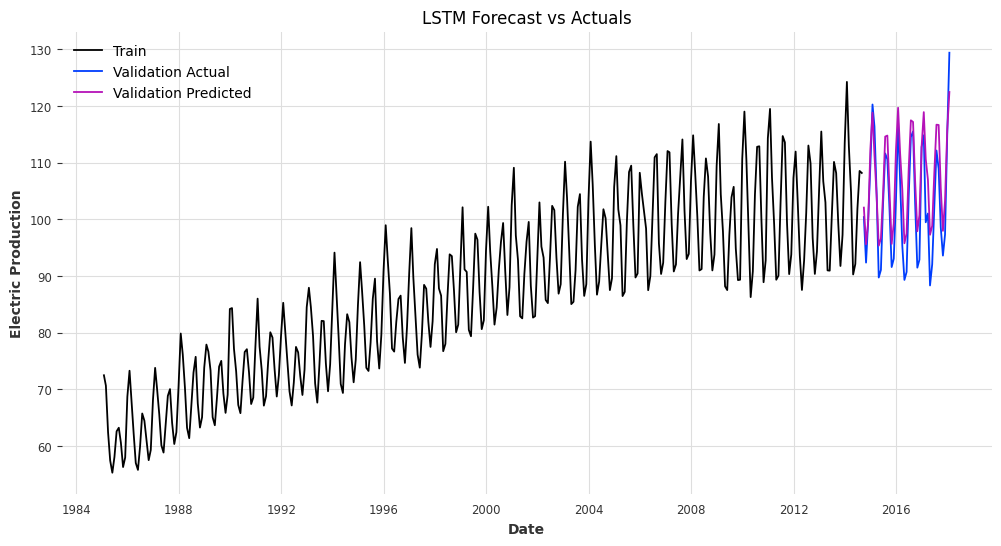

Validation RMSE: 5.476
Validation MAPE: 0.048
Validation MAE: 4.784
Validation R2: 0.703


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from darts import TimeSeries
from darts.models import RNNModel
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries

# Prepare series and covariates
series = TimeSeries.from_series(df['IPG2211A2N'])
covariates = TimeSeries.from_dataframe(df.iloc[:, 1:])  # all other columns as covariates

# Train/Validation split
train, val = series.split_before(0.9)

# Scalers
scaler_y = Scaler()
scaler_cov = Scaler()

y_train_scaled = scaler_y.fit_transform(train)
y_val_scaled = scaler_y.transform(val)

# Slice covariates to match train/val
cov_train = covariates.slice_intersect(train)
cov_val = covariates.slice_intersect(val)

# --- TRAIN ---
year_train = datetime_attribute_timeseries(cov_train, attribute="year", one_hot=False)
month_train = datetime_attribute_timeseries(cov_train, attribute="month", one_hot=True)
weekday_train = datetime_attribute_timeseries(cov_train, attribute="weekday", one_hot=True)

cov_train_stacked = cov_train.stack(year_train).stack(month_train).stack(weekday_train)
cov_train_scaled = scaler_cov.fit_transform(cov_train_stacked)

# --- VALIDATION ---
year_val = datetime_attribute_timeseries(cov_val, attribute="year", one_hot=False)
month_val = datetime_attribute_timeseries(cov_val, attribute="month", one_hot=True)
weekday_val = datetime_attribute_timeseries(cov_val, attribute="weekday", one_hot=True)

cov_val_stacked = cov_val.stack(year_val).stack(month_val).stack(weekday_val)

# Define LSTM model
input_chunk_length = 46
forecasting_horizon = len(val)  # predict full validation set

model = RNNModel(
    model="LSTM",
    hidden_dim=20,
    n_rnn_layers=2,
    dropout=0.1,
    n_epochs=20,
    optimizer_kwargs={"lr": 0.003},
    random_state=1502,
    input_chunk_length=input_chunk_length,
    training_length=input_chunk_length + forecasting_horizon,
    pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]}
)

# Train the model
model.fit(y_train_scaled, future_covariates=cov_train_scaled)

# Prepare covariates for validation prediction
# Include last input_chunk_length points from train
cov_val_for_pred = cov_train_stacked[-input_chunk_length:].append(cov_val_stacked)
cov_val_scaled_for_pred = scaler_cov.transform(cov_val_for_pred)

# Predict on validation
y_pred_scaled = model.predict(
    n=forecasting_horizon,
    future_covariates=cov_val_scaled_for_pred
)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Convert to pandas Series for plotting
y_pred_pd = pd.Series(y_pred.values().squeeze(), index=val.time_index)

# Plot train, validation actuals, and predictions
plt.figure(figsize=(12,6))
plt.plot(train.time_index, train.values(), label="Train")
plt.plot(val.time_index, val.values(), label="Validation Actual")
plt.plot(y_pred_pd.index, y_pred_pd.values, label="Validation Predicted")
plt.xlabel("Date")
plt.ylabel("Electric Production")
plt.title("LSTM Forecast vs Actuals")
plt.legend()
plt.show()

# Calculate RMSE on validation
rmse = np.sqrt(mean_squared_error(val.values(), y_pred.values()))
mape = mean_absolute_percentage_error(val.values(), y_pred.values())
mae = mean_absolute_error (val.values(), y_pred.values())
r2 = r2_score (val.values(), y_pred.values())

print(f"Validation RMSE: {rmse:.3f}")
print(f"Validation MAPE: {mape:.3f}")
print(f"Validation MAE: {mae:.3f}")
print(f"Validation R2: {r2:.3f}")

In [44]:
results["LSTM"] = {
    "RMSE": np.sqrt(mean_squared_error(val.values(), y_pred.values())),
    "MAPE": mean_absolute_percentage_error(val.values(), y_pred.values()),
    "MAE": mean_absolute_error (val.values(), y_pred.values()),
    "R2": r2_score (val.values(), y_pred.values())
}

In [45]:
print("\n📊 Model Evaluation Results:")
for model, metrics in results.items():
    print(f"{model}: RMSE={metrics['RMSE']:.2f}, MAPE={metrics['MAPE']:.2f}%, MAE={metrics['MAE']:.2f}, R2={metrics['R2']:.2f}")


📊 Model Evaluation Results:
SARIMA: RMSE=4.28, MAPE=0.03%, MAE=3.17, R2=0.83
PROPHET: RMSE=4.25, MAPE=0.03%, MAE=3.27, R2=0.83
LSTM: RMSE=5.48, MAPE=0.05%, MAE=4.78, R2=0.70


In [138]:
print("\n📊 Model Evaluation Results:")
for model, metrics in results_novel.items():
    print(f"{model}: RMSE={metrics['RMSE']:.2f}, MAPE={metrics['MAPE']:.2f}%, MAE={metrics['MAE']:.2f}, R2={metrics['R2']:.2f}")


📊 Model Evaluation Results:
N-BEATS: RMSE=7.13, MAPE=5.35%, MAE=5.55, R2=0.50
N-HiTS: RMSE=3.74, MAPE=2.63%, MAE=2.76, R2=0.85
TFT: RMSE=5.32, MAPE=3.84%, MAE=4.08, R2=0.69
